Blatant copy of Separated VAE_(GAN with LSTM_Gen_2_plus_1-INC 2) for new data 
Multivariate with quite a big dataset(15 k points first time)
Best results 
Arguably the best results I have seen yet. 
ALso helped because I have  understood scalling perfectly
The displayed results are for the training process (10+15) no_noise+ noise
When you start writing the report for the dataset make changes in batch size and write results

In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [4]:
from arff2pandas import a2p

In [61]:
!pip install -qq arff2pandas

^C


In [5]:
with open('Datasets/EEG Eye State/EEG Eye State.arff') as f:
    train=a2p.load(f)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
AF3@NUMERIC           14980 non-null float64
F7@NUMERIC            14980 non-null float64
F3@NUMERIC            14980 non-null float64
FC5@NUMERIC           14980 non-null float64
T7@NUMERIC            14980 non-null float64
P7@NUMERIC            14980 non-null float64
O1@NUMERIC            14980 non-null float64
O2@NUMERIC            14980 non-null float64
P8@NUMERIC            14980 non-null float64
T8@NUMERIC            14980 non-null float64
FC6@NUMERIC           14980 non-null float64
F4@NUMERIC            14980 non-null float64
F8@NUMERIC            14980 non-null float64
AF4@NUMERIC           14980 non-null float64
eyeDetection@{0,1}    14980 non-null object
dtypes: float64(14), object(1)
memory usage: 1.7+ MB


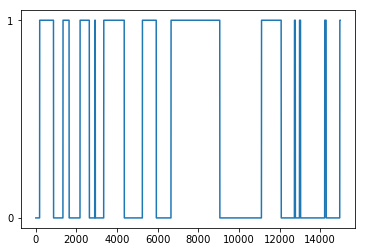

In [7]:
plt.plot(train.iloc[:,14])

In [8]:
train=train.iloc[:,:14]

In [9]:
train.columns

Index(['AF3@NUMERIC', 'F7@NUMERIC', 'F3@NUMERIC', 'FC5@NUMERIC', 'T7@NUMERIC',
       'P7@NUMERIC', 'O1@NUMERIC', 'O2@NUMERIC', 'P8@NUMERIC', 'T8@NUMERIC',
       'FC6@NUMERIC', 'F4@NUMERIC', 'F8@NUMERIC', 'AF4@NUMERIC'],
      dtype='object')

In [10]:
l=train.columns
print(l,len(l))

Index(['AF3@NUMERIC', 'F7@NUMERIC', 'F3@NUMERIC', 'FC5@NUMERIC', 'T7@NUMERIC',
       'P7@NUMERIC', 'O1@NUMERIC', 'O2@NUMERIC', 'P8@NUMERIC', 'T8@NUMERIC',
       'FC6@NUMERIC', 'F4@NUMERIC', 'F8@NUMERIC', 'AF4@NUMERIC'],
      dtype='object') 14


In [11]:
print(l)

Index(['AF3@NUMERIC', 'F7@NUMERIC', 'F3@NUMERIC', 'FC5@NUMERIC', 'T7@NUMERIC',
       'P7@NUMERIC', 'O1@NUMERIC', 'O2@NUMERIC', 'P8@NUMERIC', 'T8@NUMERIC',
       'FC6@NUMERIC', 'F4@NUMERIC', 'F8@NUMERIC', 'AF4@NUMERIC'],
      dtype='object')


In [13]:
plt.figure(figsize=(35,25))
for i in range(0,features):
    plt.subplot(7,2,i+1)
    plt.plot(train.iloc[:,i], label=l[i])
    plt.legend()
    plt.xlabel(f'feature {i+1}')

NameError: name 'features' is not defined

<Figure size 2520x1800 with 0 Axes>

Writing a whole code just for df_1 as all the 3 together are not making sense from what I understand
1)Actually using just Standardization
Gotta do val 2 and 4 definitely
Just avoid doing val 1(strongest outlier),0 and 6...remaining normalize b/w (0,1) and standardize (x-mew/sigma)

In [17]:
df_1=train
print(df_1.shape)

(14980, 14)


# data points level

10 % data points training first 1200, 200 for test


In [18]:
df_train=df_1.iloc[:12000,:14]
df_test=df_1.iloc[12000:,:14]

In [19]:
print(df_train.shape,df_test.shape)

(12000, 14) (2980, 14)


# Taking relevant batch size

In [20]:
#=========Train tensor========
num=np.array(df_train)
df_1_ten=torch.tensor(num, dtype=torch.float32)
print(df_1_ten, df_1_ten.shape)
#=========Test tensor=========
num=np.array(df_test)
test_ten=torch.tensor(num, dtype=torch.float32)
print(test_ten, test_ten.shape)

tensor([[4329.2300, 4009.2300, 4289.2300,  ..., 4280.5098, 4635.8999,
         4393.8501],
        [4324.6201, 4004.6201, 4293.8501,  ..., 4279.4902, 4632.8198,
         4384.1001],
        [4327.6899, 4006.6699, 4295.3799,  ..., 4282.0498, 4628.7202,
         4389.2300],
        ...,
        [4311.2798, 4018.9700, 4269.7402,  ..., 4295.3799, 4635.8999,
         4384.1001],
        [4317.9502, 4025.6399, 4275.8999,  ..., 4300.0000, 4644.6201,
         4394.8701],
        [4328.2100, 4032.3101, 4285.1299,  ..., 4304.6201, 4643.5898,
         4396.9199]]) torch.Size([12000, 14])
tensor([[4326.1499, 4030.2600, 4283.0801,  ..., 4299.4902, 4636.4102,
         4391.7900],
        [4320.0000, 4031.2800, 4277.9502,  ..., 4297.9502, 4643.0801,
         4394.3599],
        [4316.9199, 4032.3101, 4282.5601,  ..., 4300.0000, 4649.7402,
         4392.3101],
        ...,
        [4277.4399, 3990.7700, 4246.6699,  ..., 4257.9502, 4591.7900,
         4339.4902],
        [4284.6201, 3991.7900, 4251.279

In [21]:
num=np.array(df_train)
dummy=torch.tensor(num, dtype=torch.float32)
print(dummy, dummy.shape)

tensor([[4329.2300, 4009.2300, 4289.2300,  ..., 4280.5098, 4635.8999,
         4393.8501],
        [4324.6201, 4004.6201, 4293.8501,  ..., 4279.4902, 4632.8198,
         4384.1001],
        [4327.6899, 4006.6699, 4295.3799,  ..., 4282.0498, 4628.7202,
         4389.2300],
        ...,
        [4311.2798, 4018.9700, 4269.7402,  ..., 4295.3799, 4635.8999,
         4384.1001],
        [4317.9502, 4025.6399, 4275.8999,  ..., 4300.0000, 4644.6201,
         4394.8701],
        [4328.2100, 4032.3101, 4285.1299,  ..., 4304.6201, 4643.5898,
         4396.9199]]) torch.Size([12000, 14])


Min max sxalling of data------
not doing in 1)----terrible results again nonconvergence actually
StandardScaler in 2

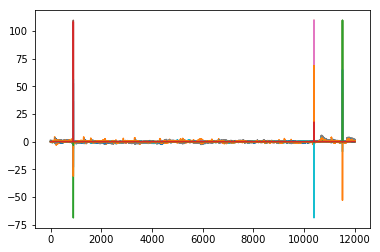

In [22]:
scalex=StandardScaler().fit(df_1_ten)
df_1_tensor=scalex.transform(df_1_ten)
df_1_tensor=torch.tensor(df_1_tensor, dtype=torch.float32)
plt.plot(df_1_tensor)

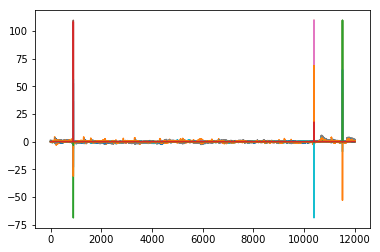

In [23]:
scale_dummy=StandardScaler().fit(dummy)
dummy=scale_dummy.transform(dummy)
dummy=torch.tensor(dummy, dtype=torch.float32)
plt.plot(dummy)

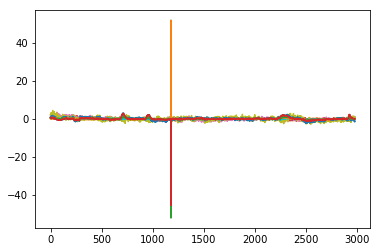

In [24]:
#2048 test points
scalex_test=StandardScaler().fit(test_ten)
test_tensor=scalex_test.transform(test_ten)
test_tensor=torch.tensor(test_tensor, dtype=torch.float32)
plt.plot(test_tensor)

Code to normalize selected features, train_tensor
will use the scalex_objs list to inverse transform the synthetic data

Normalizing test tensor

Creating objects for normalizing individual features

In [25]:
train_rows=df_1_tensor.shape[0]
features=df_1_tensor.shape[1]
test_rows=test_tensor.shape[0]
#test_columns=test_tensor.shape[1]
print(train_rows,features,test_rows)#,test_columns)

12000 14 2980


In [80]:
print(4095//5,2045//5)

819 409


Reshaping for LSTM-----whole data 

Dummy 1 for neural network, dummy 2 to compare to synthetic data
both are same but dummy will change because of Gradient descent

In [26]:
print(dummy.shape)
print(df_1_tensor.shape)
print(test_tensor.shape)

torch.Size([12000, 14])
torch.Size([12000, 14])
torch.Size([2980, 14])


In [27]:
#replacing parameter bs by two different parameters 5 i_p and  bs=25(ie 20 noise pts)
#iterating over 4095
#Nested for loop for batch of 25
flag=0
bs=25
noise=1 #wont be used ich denke
for i in range(0, dummy.shape[0]):
    #print(i)
    if(flag<10):
#        print(flag)
        print("no_noise")
#        dummy[i,:]=dummy[i,:]# actually makes no sense I guess
        flag+=1
    elif(flag>=1 and flag<25):
        print(flag)
        flag+=1
        print("noise")
        dummy[i,:]=torch.randn([1,features])
    elif(flag==25):
        flag=0
        print(flag)

no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10

noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_

no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18

noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_

11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21

11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21

19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise


11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21

16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise


no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise
14
noise
15
noise
16
noise
17
noise
18
noise
19
noise
20
noise
21
noise
22
noise
23
noise
24
noise
0
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
no_noise
10
noise
11
noise
12
noise
13
noise


In [83]:
#insert noise
#iterating over 4095
bs=5
for i in range(0, dummy.shape[0]):
    if(i%bs==0):
        print("noise")
        dummy[i,:]=torch.randn([1,features])#actually realizing later this makes no sense
    else:
        print("no_noise")
        dummy[i,:]=dummy[i,:] 

noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
n

no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_nois

no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_nois

no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
n

no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
n

no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_nois

no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
n

no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
n

no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_nois

no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_noise
noise
no_noise
no_noise
no_noise
no_nois

Text(0.5, 0, 'noisy')

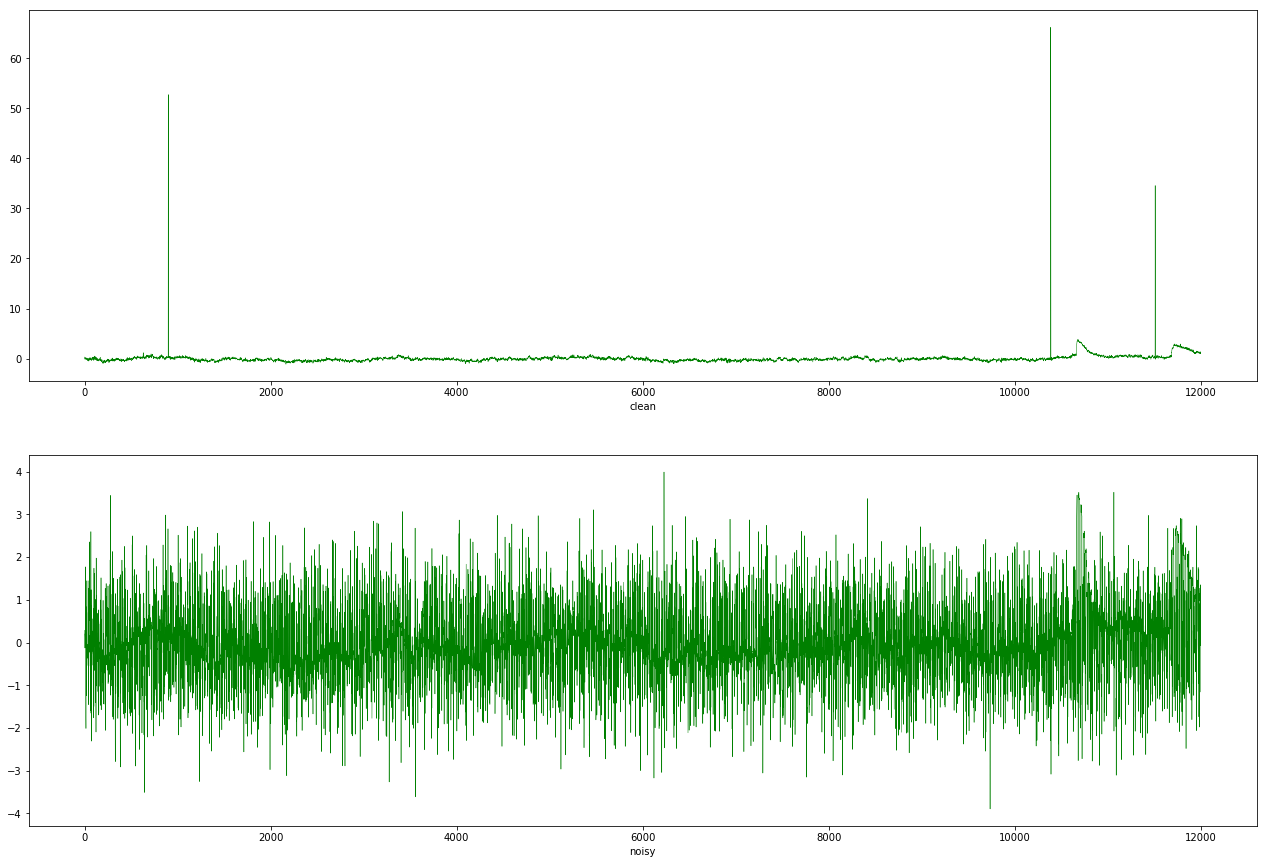

In [28]:
feature_required=4
plt.figure(figsize=(22,15))
plt.subplot(2,1,1)
plt.plot(df_1_tensor[:,feature_required],  color='green', linewidth=0.5, markersize='0.3',label='clean')
plt.xlabel('clean')

plt.subplot(2,1,2)
plt.plot(dummy[:,feature_required],  color='green', linewidth=0.5, markersize='0.3')
plt.xlabel('noisy')

In [85]:
Wont use most probably
df_1_tensor=df_1_tensor.reshape((1,train_rows,features))
test_tensor=test_tensor.reshape((1,test_rows,test_columns))
print(df_1_tensor.shape,test_tensor.shape)

SyntaxError: invalid syntax (<ipython-input-85-b42c3d4f8d12>, line 1)

If you change the values of df_1_tensor, dummy changes too

In [ ]:
print(df_1_tensor.shape)
plt.plot(dummy[:,0,5])

Reshaping for LSTM ---- batches data...Manually making batches of 3 for req 2) later automate for no. of batches

# Batch_size

In [47]:
# This is the batch sizeeee
bs=25

In [ ]:
plt.plot(dummy[0,:,6])

In [ ]:
df_1=pd.read_csv('Datasets/Rapid Component degradation Vega/NewBlade001.csv')
df_2=pd.read_csv('Datasets/Rapid Component degradation Vega/NewBlade002.csv')
df_3=pd.read_csv('Datasets/Rapid Component degradation Vega/NewBlade003.csv')
##taking 1 and 2 for training data and 3 for test data


Making the tensor as required....Every third, then 5th data point taken with noise elsewhere

In [ ]:
df_old=df_1_tensor.detach()

In [ ]:
print(df_old.shape)
plt.plot(df_old[0,:,0])

In [ ]:
print(df_1_tensor.shape)

In [ ]:
print(df_1_tensor.shape)
plt.plot(df_1_tensor[1,:,2])
#correct

In [ ]:
print(test_tensor.shape)
plt.plot(test_tensor[680,:,6])

# Constructing training process(batches) Automates size

In [29]:
for i in range(1,train_rows+1):
    if(i%bs==0):
        new_len=i
print(new_len)
print(train_rows//bs)

12000
480


In [30]:
dummy=dummy[:new_len,:]
df_1_tensor=df_1_tensor[:new_len,:]
print(dummy.shape,df_1_tensor.shape)

torch.Size([12000, 14]) torch.Size([12000, 14])


In [31]:
for i in range(1,test_rows+1):
    if(i%bs==0):
        new_len=i
print(new_len)

2975


In [32]:
test_tensor=test_tensor[:new_len,:]
print(test_tensor.shape)

torch.Size([2975, 14])


In [33]:
df_1_tensor=df_1_tensor.reshape((train_rows//bs,bs,features))
test_tensor=test_tensor.reshape((test_rows//bs,bs,features))
print(df_1_tensor.shape,test_tensor.shape)
dummy=dummy.reshape((train_rows//bs,bs,features))
print(dummy.shape)

torch.Size([480, 25, 14]) torch.Size([119, 25, 14])
torch.Size([480, 25, 14])


In [34]:
print(df_1_tensor.shape)

torch.Size([480, 25, 14])


# Neural Network

In [ ]:
##making an LSTM to understand
##Made the whole thing, atleast I can say that I embedded an LSTM into the network somehow with a linear layer using dictionaries
class Test(nn.Module): ## var=LSTM_size, bottleneck_nodes=bot_nodes
    def __init__(self,n_features, lstm, bottleneck_nodes,noise):
        super().__init__()
        
        self.x1_cap=torch.zeros((1,bs,n_features))# ------Hardcoded bs should be entered actually
        self.n_features, self.lstm, self.noise=n_features,lstm,noise
        self.bot_nodes=bottleneck_nodes
        ##took me a full evenings and frustration, LSTM always takes 3 dimesions, let the first one be 1
        self.encoder=nn.ModuleDict({
            'Lstm1':nn.LSTM(
                input_size=self.n_features,
                hidden_size=self.lstm*3,
            ),
            'Lstm2':nn.LSTM(
                input_size=self.lstm*3,
                hidden_size=self.lstm*2,
            ),
            'Lstm3':nn.LSTM(
                input_size=self.lstm*2,
                hidden_size=self.lstm,
            ),

            'Linear':nn.Linear(self.lstm, self.bot_nodes*2),# Can vary the bottle neck
        })
        
        self.decoder=nn.ModuleDict({
            'Lstm4':nn.LSTM(
                input_size=self.bot_nodes,#+self.noise, redundant from last meet
                hidden_size=self.lstm*3
            ),
            'Lstm5':nn.LSTM(
                input_size=self.lstm*3,
                hidden_size=self.lstm*2
            ),
            'Lstm6':nn.LSTM(
                input_size=self.lstm*2,
                hidden_size=self.lstm
            ),
            'Linear':nn.Linear(self.lstm+self.n_features,self.n_features*2),
        })
    def getsample(self, mu, logvar):
        if self.training: #inbuilt object which according to me is inherited from nn.Module, comes when model.train() used
            stan_dev=logvar.mul(0.5).exp_()
            eps = stan_dev.data.new(stan_dev.size()).normal_()#acually epsilon is from normal dis table, sample is the whole Mew+X*sigma
            return eps.mul(stan_dev).add_(mu)#Mew+X*sigma
        else:
            return mu
    
    def forward(self,x):
        length=x.shape[0]#to get seq_len
        x=x.reshape((1, length, self.n_features))# batch sends the whole things, not using SGD,
        x,_=self.encoder['Lstm1'](x)
        x,_=self.encoder['Lstm2'](x)
        x,_=self.encoder['Lstm3'](x)
        mu_logvar=self.encoder['Linear'](x)
        #a leap of faith, for knowing how mu is [:0:] and logvar[:1:], actually just a bunch of the outputs 
        #taken as mean and variance
        mu1=mu_logvar[:, :, 0:self.bot_nodes]# dimension at mu_logvar1/bottleneck               
        logvar1 = mu_logvar[:,:, self.bot_nodes:self.bot_nodes*2]
        z=self.getsample(mu1,logvar1)#need to feed this to the decoder, not used actually---not needed this z
        #reshape it into (hidden_dim x features)
#        z=z.reshape((1, length, self.n_features)) #dont need the reshape anymore
#        z=z+torch.randn([1,2,7]) #added some noise in decoder to try and train with some noise----will make z=randn
#        n=torch.randn([1,length,self.noise])
#        d=torch.cat((z,n),2)
        d,_=self.decoder['Lstm4'](z)
        d,_=self.decoder['Lstm5'](d)
        d,_=self.decoder['Lstm6'](d)
        #and then added x1cap to it and see what happens---shouldnt literally plus add columns
        d=torch.cat((d,self.x1_cap),2) #2 because basically adding columns so in the last dimension,ie making 7 to (7 + bot_nodes)
#       #z=z.reshape((1, self,self.var*2))
#         m = nn.Dropout(p=0.2)
#         d=m(d)
#        d=d.reshape([-1])
        d=self.decoder['Linear'](d)
    #Still need to know the perfect reason why these are means and logvariances
        mu2=d[:,:,0:self.n_features]
        logvar2=d[:,:,self.n_features:self.n_features*2]
        self.x1_cap=self.getsample(mu2.detach(),logvar2.detach())
        #print("x1_cap",self.x1_cap.shape)
        return mu2,logvar2,mu1,logvar1

In [36]:
class Encoder(nn.Module):
    def __init__(self,n_features, lstm, bottleneck_nodes): # noise mostly obsolete
        super(Encoder, self).__init__()
        self.n_features, self.lstm=n_features,lstm
        self.bot_nodes=bottleneck_nodes
        
        self.layer1=nn.Sequential(
            nn.LSTM(n_features,lstm*3),
        )
        self.layer2=nn.Sequential(
            nn.LSTM(lstm*3,lstm*2),
        )
        self.layer3=nn.Sequential(
            nn.LSTM(lstm*2,lstm*2),
        )
        
        self.layer4 = nn.Sequential(
            nn.Linear(lstm*2,bottleneck_nodes*2),
            #nn.Sigmoid() #for BCE
        )
    def getsample(self, mu, logvar):
        if self.training: #inbuilt object which according to me is inherited from nn.Module, comes when model.train() used
            stan_dev=logvar.mul(0.5).exp_()
            eps = stan_dev.data.new(stan_dev.size()).normal_()#acually epsilon is from normal dis table, sample is the whole Mew+X*sigma
            return eps.mul(stan_dev).add_(mu)#Mew+X*sigma
        else:
            return mu
        
    def forward(self,x):
        length=x.shape[0]#to get seq_len
        x=x.reshape((1, length, self.n_features))# batch sends the whole things, not using SGD,
        x,_=self.layer1(x)
        x,_=self.layer2(x)
        x,_=self.layer3(x)
        mu_logvar=self.layer4(x)
        #a leap of faith, for knowing how mu is [:0:] and logvar[:1:], actually just a bunch of the outputs 
        #taken as mean and variance
        mu1=mu_logvar[:, :, 0:self.bot_nodes]# dimension at mu_logvar1/bottleneck               
        logvar1 = mu_logvar[:,:, self.bot_nodes:self.bot_nodes*2]
        z=self.getsample(mu1,logvar1)
        return mu1,logvar1, z
#encoder = Encoder(features, lstm_size, bot_nodes)

In [ ]:
print(dummy.shape)

In [ ]:
enc=Encoder(14,20,30)
for i in range(0,train_rows//bs):
    #print(dummy[i,:,:])
    x=enc(dummy[i,:,:])
    print(x.dtype)

In [ ]:
bot_nodes=80
lstm_size=50 # two major hyperparamertes

In [ ]:
torch.zeros((1,bs,features)).shape

In [37]:
class Decoder(nn.Module):
    def __init__(self,n_features, lstm, bottleneck_nodes):
        super(Decoder, self).__init__()
        self.n_features, self.lstm=n_features,lstm
        self.bot_nodes=bottleneck_nodes
        self.x1_cap=torch.zeros((1,bs,n_features))
        
        self.layer1=nn.Sequential(
                nn.LSTM(bottleneck_nodes,lstm*3),
            )
        self.layer2=nn.Sequential(
                nn.LSTM(lstm*3,lstm*2),
            )
        self.layer3=nn.Sequential(
                nn.LSTM(lstm*2,lstm*2),
            )
        self.layer4 = nn.Sequential(
                nn.Linear(lstm*2,n_features*2)
                #nn.Linear(lstm+features,n_features*2),
                #nn.Sigmoid() #for BCE
            )
    def getsample(self, mu, logvar):
        if self.training: #inbuilt object which according to me is inherited from nn.Module, comes when model.train() used
            stan_dev=logvar.mul(0.5).exp_() 
            eps = stan_dev.data.new(stan_dev.size()).normal_()#acually epsilon is from normal dis table, sample is the whole Mew+X*sigma
            return eps.mul(stan_dev).add_(mu)#Mew+X*sigma
        else:
            return mu
    ##start changing this
    def forward(self,z):
        d,_=self.layer1(z)
        d,_=self.layer2(d)
        d,_=self.layer3(d)
        #and then added x1cap to it and see what happens---shouldnt literally plus add columns
#        d=torch.cat((d,self.x1_cap),2) #2 because basically adding columns so in the last dimension,ie making 7 to (7 + bot_nodes)
#       #z=z.reshape((1, self,self.var*2))
#         m = nn.Dropout(p=0.2)
#         d=m(d)
#        d=d.reshape([-1])
        d=self.layer4(d)
        #Still need to know the perfect reason why these are means and logvariances
        mu2=d[:,:,0:self.n_features]
        logvar2=d[:,:,self.n_features:self.n_features*2]
#        self.x1_cap=self.getsample(mu2.detach(),logvar2.detach())
        #print("x1_cap",self.x1_cap.shape)
        return mu2,logvar2
#decoder = Decoder(features, lstm_size, bot_nodes)

In [204]:
df_1_tensor=df_1_tensor.reshape((train_rows//bs,bs,features))

In [38]:
# delete soon
print(df_1_tensor.shape)
print(test_tensor.shape)
print(dummy.shape)

torch.Size([480, 25, 14])
torch.Size([119, 25, 14])
torch.Size([480, 25, 14])


# Training new model

In [39]:
class join_enc_dec(nn.Module):
    def __init__(self, features, lstm_size, bot_nodes):
        super(join_enc_dec, self).__init__()
        
        self.encoder = Encoder(features, lstm_size, bot_nodes)
        self.decoder = Decoder(features, lstm_size, bot_nodes)
        
    def forward(self,x):
        mu1,logvar1,z=self.encoder(x)
        mu2,logvar2=self.decoder(z)
        
        return mu2,logvar2,mu1,logvar1
        
    def gen_syn_data(self,z):
        mu2,logvar2=self.decoder(z)
        d=self.decoder.getsample(mu2,logvar2)        
            
        return d

In [ ]:
Not using
def joiner(x):
    mu1,logvar1,z=encoder(x)
    mu2,logvar2=decoder(z)
        
    return mu2,logvar2,mu1,logvar1

In [ ]:
print(df_1_tensor.shape,dummy.shape,test_tensor.shape)

In [ ]:
df_1_tensor=df_1_tensor.reshape(1,4095,7)
dummy=dummy.reshape(1,4095,7)
test_tensor=test_tensor.reshape(1,2045,7)

In [ ]:
#changed the next two from 50, 30 to 80,50

Will enter encoder and decoeder in join and make object of that and send that object and that optimizer in the train
method instead, wont need to send two object optimizer that way and now instead of writing the initialization below
the classes I write em in the join function and values will be sent when we initialize join(seq_len, etc etc)

Have to ask the professor about if E,D and Disc work in parallel or first  E,D and then Disc


In [ ]:
 for i in range(0,train_rows//bs):
        mu2,logvar2,mu1,logvar1=model(dummy[i,:,:])  
#             optimizer.zero_grad()
#             #============forward=========
#             mu2,logvar2,mu1,logvar1,z=model(dummy[i,:,:])

In [ ]:
for x in test_tensor:
        mu2,logvar2,mu1,logvar1=model(x) 

In [64]:
model.parameters

<bound method Module.parameters of join_enc_dec(
  (encoder): Encoder(
    (layer1): Sequential(
      (0): LSTM(14, 240)
    )
    (layer2): Sequential(
      (0): LSTM(240, 160)
    )
    (layer3): Sequential(
      (0): LSTM(160, 160)
    )
    (layer4): Sequential(
      (0): Linear(in_features=160, out_features=100, bias=True)
    )
  )
  (decoder): Decoder(
    (layer1): Sequential(
      (0): LSTM(50, 240)
    )
    (layer2): Sequential(
      (0): LSTM(240, 160)
    )
    (layer3): Sequential(
      (0): LSTM(160, 160)
    )
    (layer4): Sequential(
      (0): Linear(in_features=160, out_features=28, bias=True)
    )
  )
)>

In [228]:
bot_nodes=50
lstm_size=30 #before it was 30
model=join_enc_dec(features, lstm_size, bot_nodes)

In [48]:
#join_enc_dec()
epochs=20
bot_nodes=50
lstm_size=80
model=join_enc_dec(features, lstm_size, bot_nodes)
learn_rate=1e-3
optimizer=torch.optim.Adam(
     model.parameters(), lr=learn_rate
)
train_VAE(epochs,optimizer,model,df_1_tensor,test_tensor)

train loss in epoch 0 1250.6582735397997
test loss in epoch 0 1.5458212196826935
train loss in epoch 1 5.6952391738096875
test loss in epoch 1 1.4593296647071838
train loss in epoch 2 2.8125713895956674
test loss in epoch 2 1.4808382093906403
train loss in epoch 3 1.6397157984574635
test loss in epoch 3 1.5511088222265244
train loss in epoch 4 1.7777985597451529
test loss in epoch 4 1.577796295285225
train loss in epoch 5 2.4162846625645957
test loss in epoch 5 1.6335114389657974
train loss in epoch 6 4.51404788351059
test loss in epoch 6 1.6068025827407837
train loss in epoch 7 1.597131268342336
test loss in epoch 7 1.6121356636285782
train loss in epoch 8 2.069086105187734
test loss in epoch 8 1.6129401624202728
train loss in epoch 9 1.0143833266099294
test loss in epoch 9 1.6867916882038116
train loss in epoch 10 1.2287633864879608
test loss in epoch 10 1.7115075290203094
train loss in epoch 11 1.0780111066500346
test loss in epoch 11 1.7373085021972656
train loss in epoch 12 0.9493

In [42]:
train_losses=[]
test_losses=[]
def train_VAE(epochs,optimizer,model,train_data,test_data):
    
    for epoch in range(0,epochs+1):
    #training
        model.train()
#         encoder.train()
#         decoder.train()
        train_loss=0
    ##x happens only once since that is how the data has been split, no batch SGD is used
    #    for x in df_1_tensor:
        for i in range(0,train_rows//bs):
            optimizer.zero_grad()
            #============forward=========
            mu2,logvar2,mu1,logvar1=model(dummy[i,:,:])
#             mu2,logvar2,mu1,logvar1=joiner(dummy[i,:,:]) #noisy data fed here
            #print(mu2.shape,logvar2.shape,mu1.shape,logvar1.shape,x.shape)
            loss=loss_function_comb(mu2,logvar2,mu1,logvar1,df_1_tensor[i,:,:]) #loss function is wrt to actual data
            train_loss+=loss.item()
            #=====backpropagation=======
            #print(train_loss)
            loss.backward()
            optimizer.step()
        train_losses.append(train_loss)    
        print("train loss in epoch",epoch,train_loss/train_rows)
        with torch.no_grad():
            model.eval()
#             encoder.eval()
#             decoder.eval()#switch to let the network know, to prevent gradient evaluation during testing alongwith torch.no_grad()
            test_loss=0
            MSE=0
            L1=0
            for x in test_tensor:
                seq_len=x.shape[0]
                points=x.shape[1]
                #==============forward=========
                mu2,logvar2,mu1,logvar1=model(x)
#                 mu2,logvar2,mu1,logvar1 = joiner(x)
                test_loss= loss_function(mu2,logvar2,mu1,logvar1,x).item()    ##same as training
                mu2=mu2.reshape([bs,features])
                L1=nn.L1Loss()
                L1=L1(x,mu2)
                MSE=nn.MSELoss()
                MSE=MSE(x,mu2)
                test_loss+=L1.item()+MSE.item()
            test_losses.append(test_loss)    
            print("test loss in epoch",epoch,test_loss)

In [50]:
noise_len=train_rows//bs
feed_noise=torch.randn(noise_len,bs,bot_nodes)
with torch.no_grad():
    model.eval()
    d=model.gen_syn_data(feed_noise)
    
#     def gen_syn_data():
#         with torch.no_grad():
#             model.eval()
#             z=feed_noise # finally parameterized
#             z,_=decoder.layer1(z)
#             d,_=decoder.layer2(z)
#             d,_=decoder.layer3(d)
#         #    d=nn.functional.sigmoid(d)
#             x1_cap=torch.zeros((1000,bs,features))
#             #x1_cap=torch.randn((1000,5,features))
#             d=torch.cat((d,x1_cap),2) 
#             d=decoder.layer4(d)
#         #    d=nn.Sigmoid(d)
#             mu2=d[:,:,0:features]
#             logvar2=d[:,:,features:features*2]
#             d=decoder.getsample(mu2,logvar2)
#             return d
#     d=gen_syn_data()

In [ ]:
print

In [51]:
d=d.reshape(train_rows,features)
df_1_tensor=df_1_tensor.reshape(train_rows,features)

In [52]:
print(d.shape,df_1_tensor.shape)

torch.Size([12000, 14]) torch.Size([12000, 14])


In [53]:
p=torch.tensor(scalex.inverse_transform(d))
print(p.shape)

torch.Size([12000, 14])


In [54]:
l=train.columns
print(l,len(l))

Index(['AF3@NUMERIC', 'F7@NUMERIC', 'F3@NUMERIC', 'FC5@NUMERIC', 'T7@NUMERIC',
       'P7@NUMERIC', 'O1@NUMERIC', 'O2@NUMERIC', 'P8@NUMERIC', 'T8@NUMERIC',
       'FC6@NUMERIC', 'F4@NUMERIC', 'F8@NUMERIC', 'AF4@NUMERIC'],
      dtype='object') 14


# 12000 train 2980 test

In [ ]:
plt.figure(figsize=(28,27))
for i in range(0,df_1_ten.shape[1]):
    plt.subplot(7,2,i+1)
    plt.plot(df_1_ten[:,i], label="normal")
    plt.legend()
    plt.plot(p[:,i],label="synthetic")
    plt.xlabel(f'feature {i+1}'+'  '+l[i])
    plt.legend()

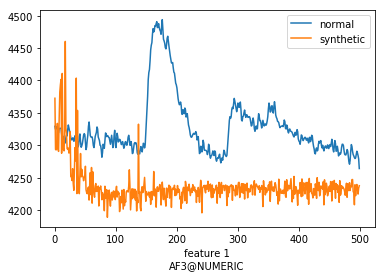

In [55]:
i=0
pts=500
plt.plot(df_1_ten[:pts,i], label="normal")
plt.legend()
plt.plot(p[:pts,i],label="synthetic")
plt.xlabel(f'feature {i+1}'+'\n'+l[i])
plt.legend()

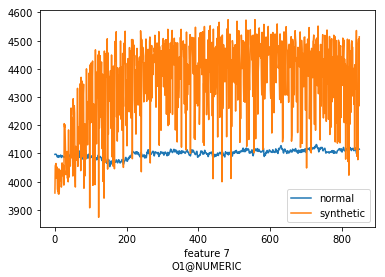

In [56]:
i=6
pts=850
plt.plot(df_1_ten[:pts,i], label="normal")
plt.legend()
plt.plot(p[:pts,i],label="synthetic")
plt.xlabel(f'feature {i+1}'+'\n'+l[i])

plt.legend()

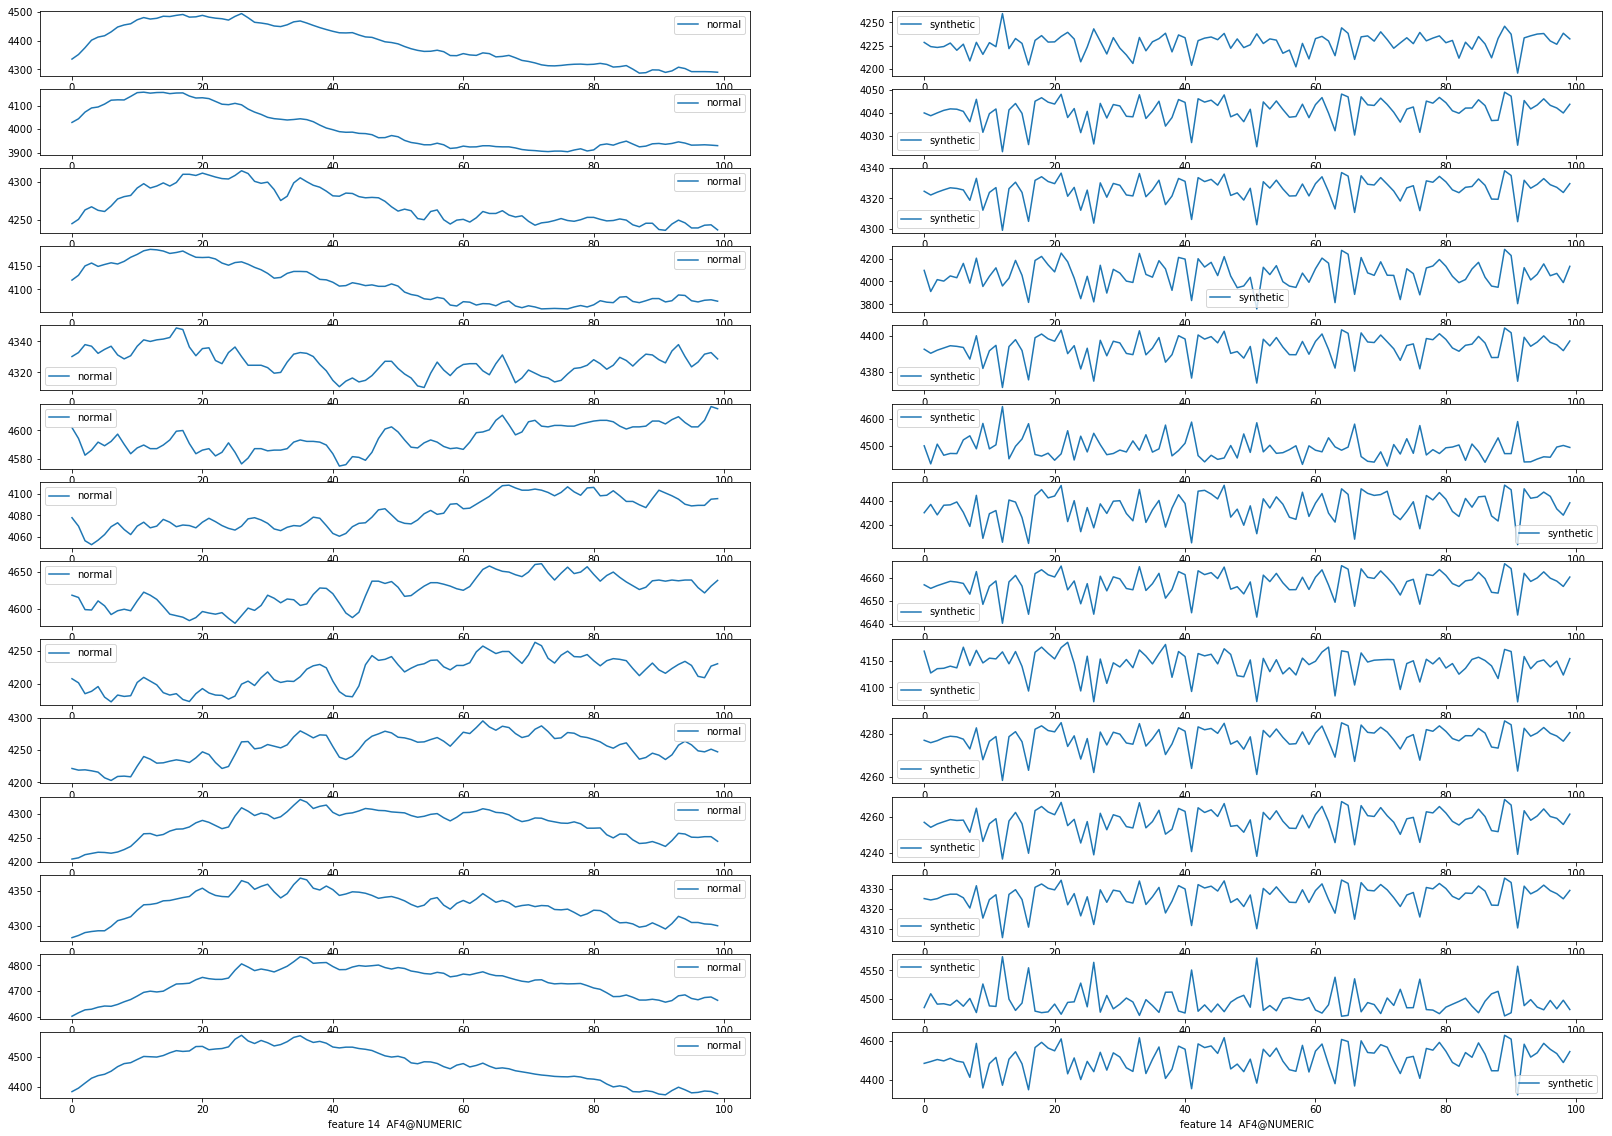

In [65]:
#Cant really see any major dependencies being covered between points 150 and 200
lo=[0,1,2,3,4,5,6,7,8,9,10,11,12,13]
plt.figure(figsize=(28,20))
for i,j in enumerate(lo):
    plt.subplot(14,2,2*i+1)
    plt.plot(df_1_ten[150:250,j], label="normal")
    plt.xlabel(f'feature {j+1}'+'  '+l[j])
    plt.legend()
    #plt.xlim([150,250])
    plt.subplot(14,2,2*i+2)
    plt.plot(p[150:250,j],label="synthetic")
    plt.xlabel(f'feature {j+1}'+'  '+l[j])
    #plt.xlim([150,250])
    plt.legend()

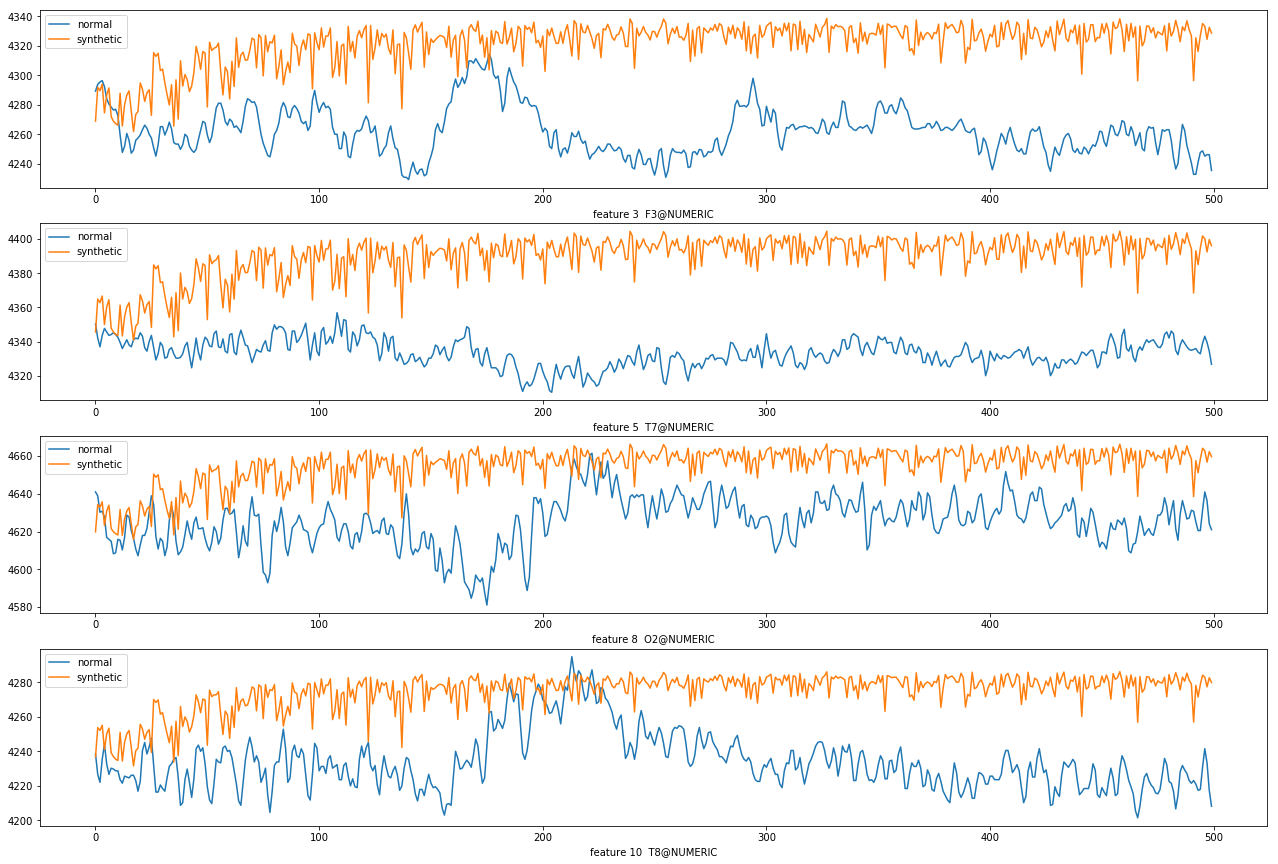

In [58]:
lo=[2,4,7,9]
pts=500
plt.figure(figsize=(22,15))
for i,j in enumerate(lo):
    plt.subplot(4,1,i+1)
    plt.plot(df_1_ten[:pts,j], label="normal")
    plt.legend()
    # plt.subplot(2,2,2)
    plt.plot(p[:pts,j],label="synthetic")
    plt.xlabel(f'feature {j+1}'+'  '+l[j])
    plt.legend()

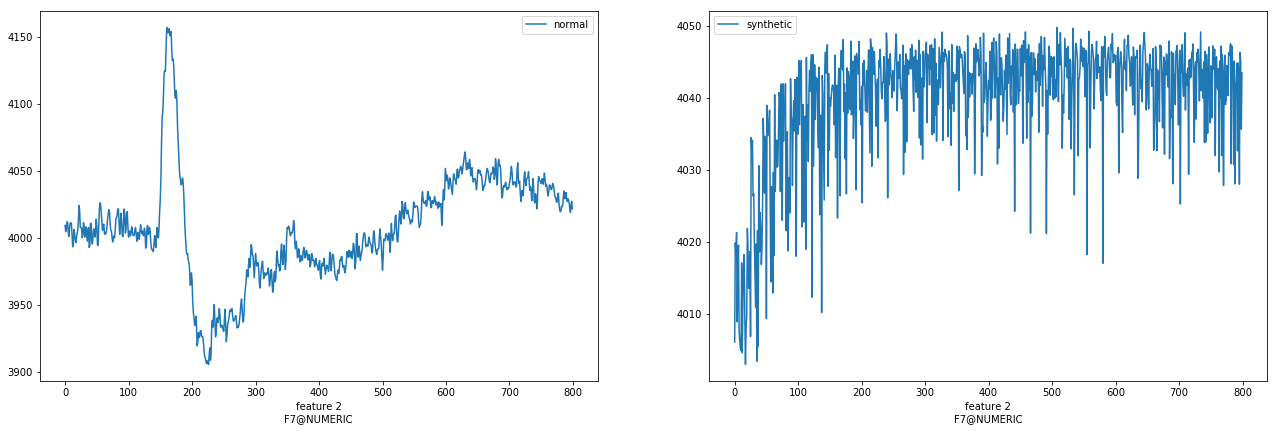

In [59]:
i=1
plt.figure(figsize=(22,15))
plt.subplot(2,2,1)
plt.plot(df_1_ten[:800,i], label="normal")
plt.xlabel(f'feature {i+1}'+'\n'+l[i])
plt.legend()
plt.subplot(2,2,2)
plt.plot(p[:800,i],label="synthetic")
plt.xlabel(f'feature {i+1}'+'\n'+l[i])
plt.legend()

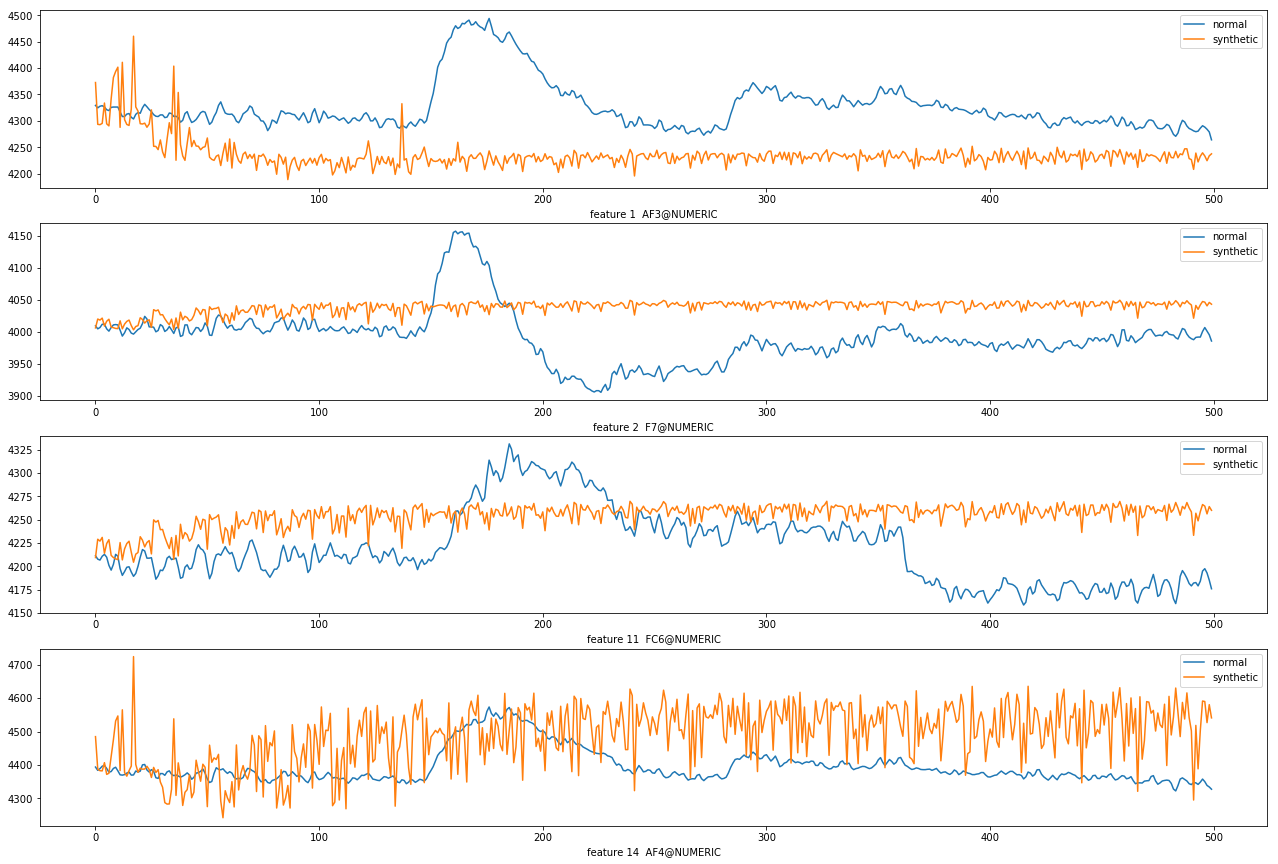

In [60]:
#i=7,i=2,i=4,i=9 good...
lo=[0,1,10,13]
pts=500
plt.figure(figsize=(22,15))
for i,j in enumerate(lo):
    plt.subplot(4,1,i+1)
    plt.plot(df_1_ten[:pts,j], label="normal")
    plt.legend()
    # plt.subplot(2,2,2)
    plt.plot(p[:pts,j],label="synthetic")
    plt.xlabel(f'feature {j+1}'+'  '+l[j])
    plt.legend()

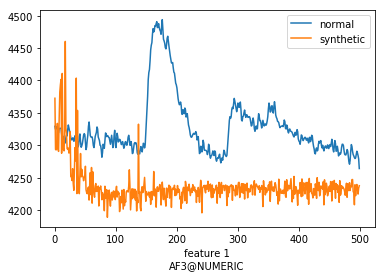

In [61]:
#i=7,i=2,i=4,i=9 good...bad i=0,13, 1, 10
i=0
pts=500
plt.plot(df_1_ten[:pts,i], label="normal")
plt.legend()
plt.plot(p[:pts,i],label="synthetic")
plt.xlabel(f'feature {i+1}'+'\n'+l[i])
plt.legend()

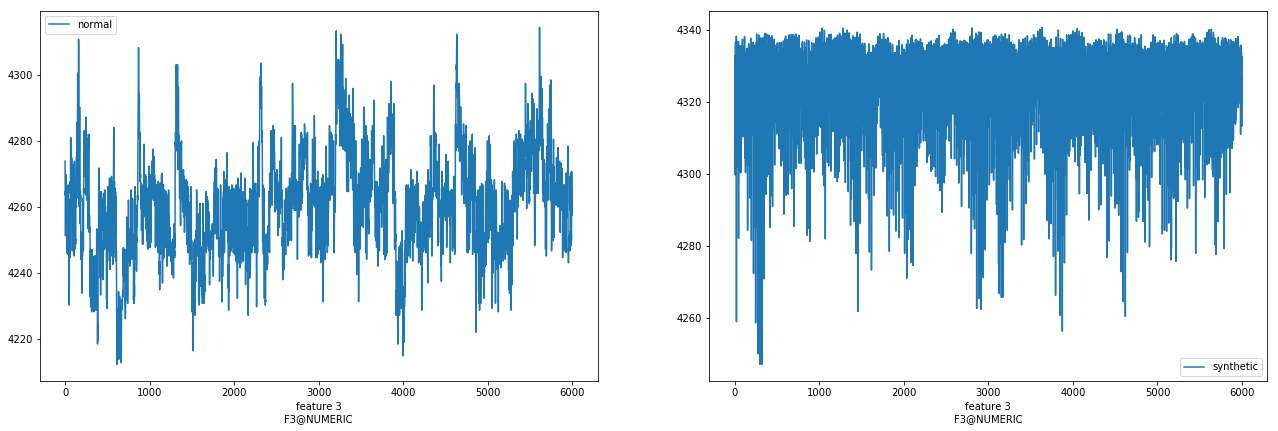

In [62]:
i=2
plt.figure(figsize=(22,15))
plt.subplot(2,2,1)
plt.plot(df_1_ten[2000:8000,i], label="normal")
plt.xlabel(f'feature {i+1}'+'\n'+l[i])
plt.legend()
plt.subplot(2,2,2)
plt.plot(p[2000:8000,i],label="synthetic")
plt.xlabel(f'feature {i+1}'+'\n'+l[i])
plt.legend()

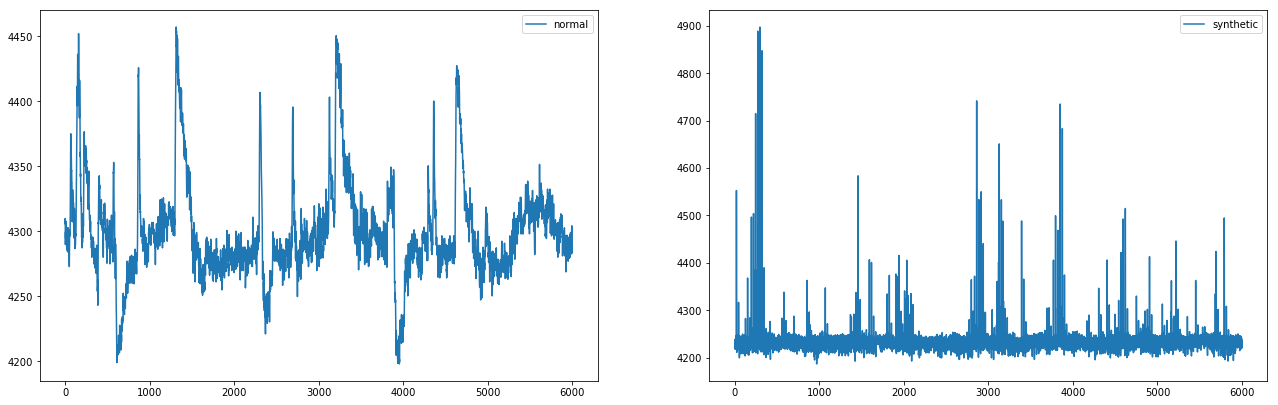

In [63]:
i=0
plt.figure(figsize=(22,15))
plt.subplot(2,2,1)
plt.plot(df_1_ten[2000:8000,i], label="normal")
plt.legend()
plt.subplot(2,2,2)
plt.plot(p[2000:8000,i],label="synthetic")
plt.legend()

In [76]:
print((p[:,0]))

tensor([4308.9814, 4233.5312, 4210.5249,  ..., 4573.6748, 4284.9277,
        4677.0615])


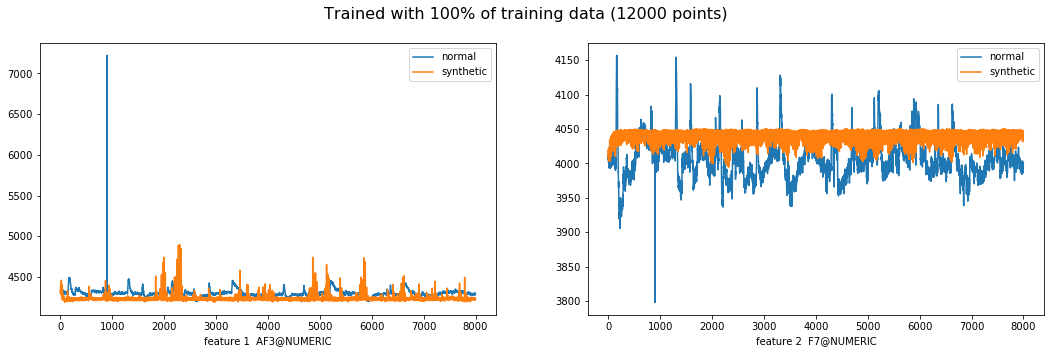

In [73]:
plt.figure(figsize=(18,5))
for i in range(0,2):
    plt.subplot(1,2,i+1)
    plt.plot(df_1_ten[:8000,i], label="normal")
    plt.legend()
    plt.plot(p[:8000,i],label="synthetic")
    plt.xlabel(f'feature {i+1}'+'  '+l[i])
    plt.legend()
    plt.suptitle("Trained with 100% of training data (12000 points)",fontsize=16)

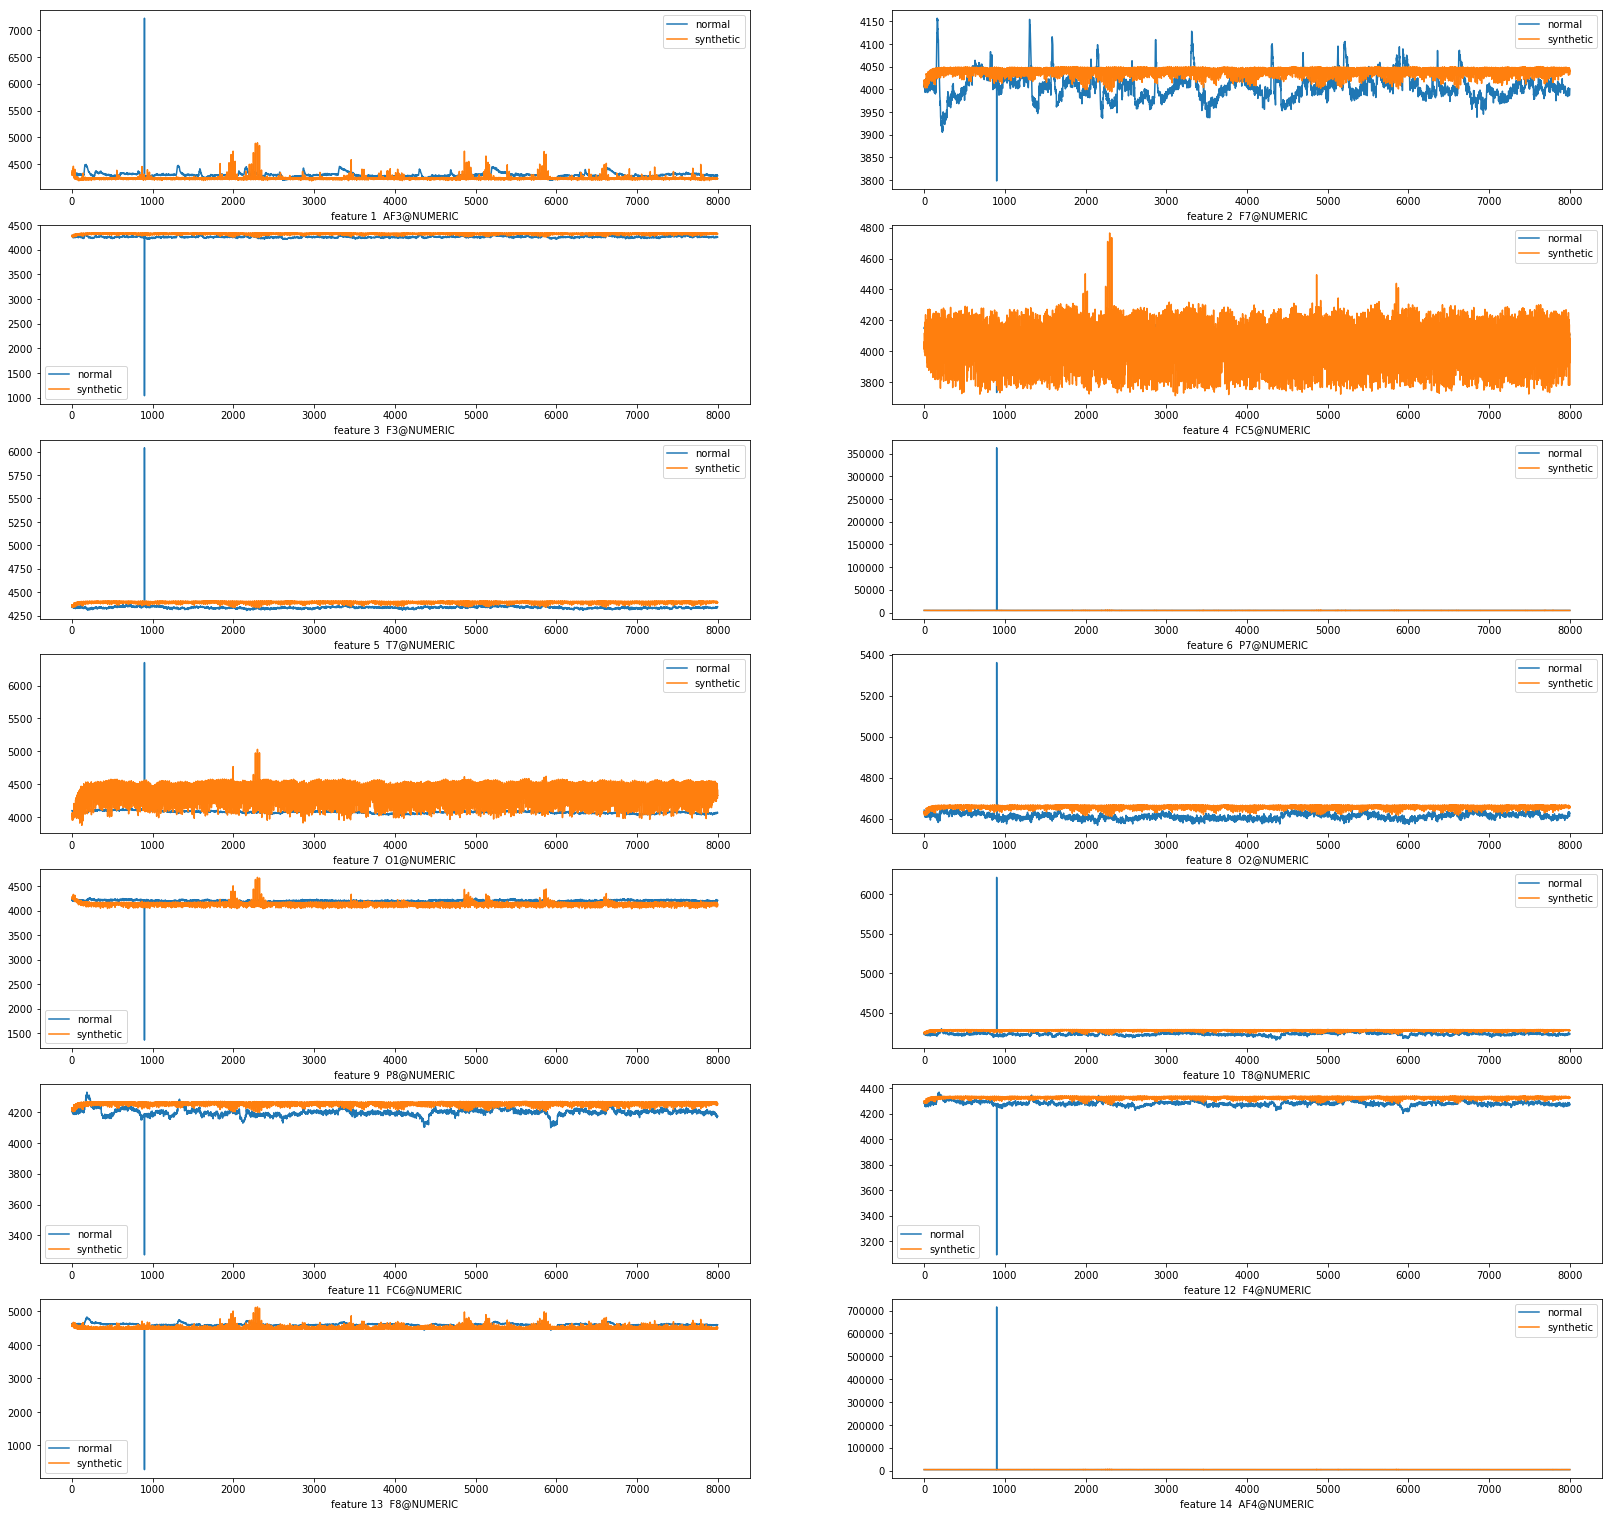

In [69]:
plt.figure(figsize=(28,27))
for i in range(0,df_1_ten.shape[1]):
    plt.subplot(7,2,i+1)
    plt.plot(df_1_ten[:8000,i], label="normal")
    plt.legend()
    plt.plot(p[:8000,i],label="synthetic")
    plt.xlabel(f'feature {i+1}'+'  '+l[i])
    plt.legend()

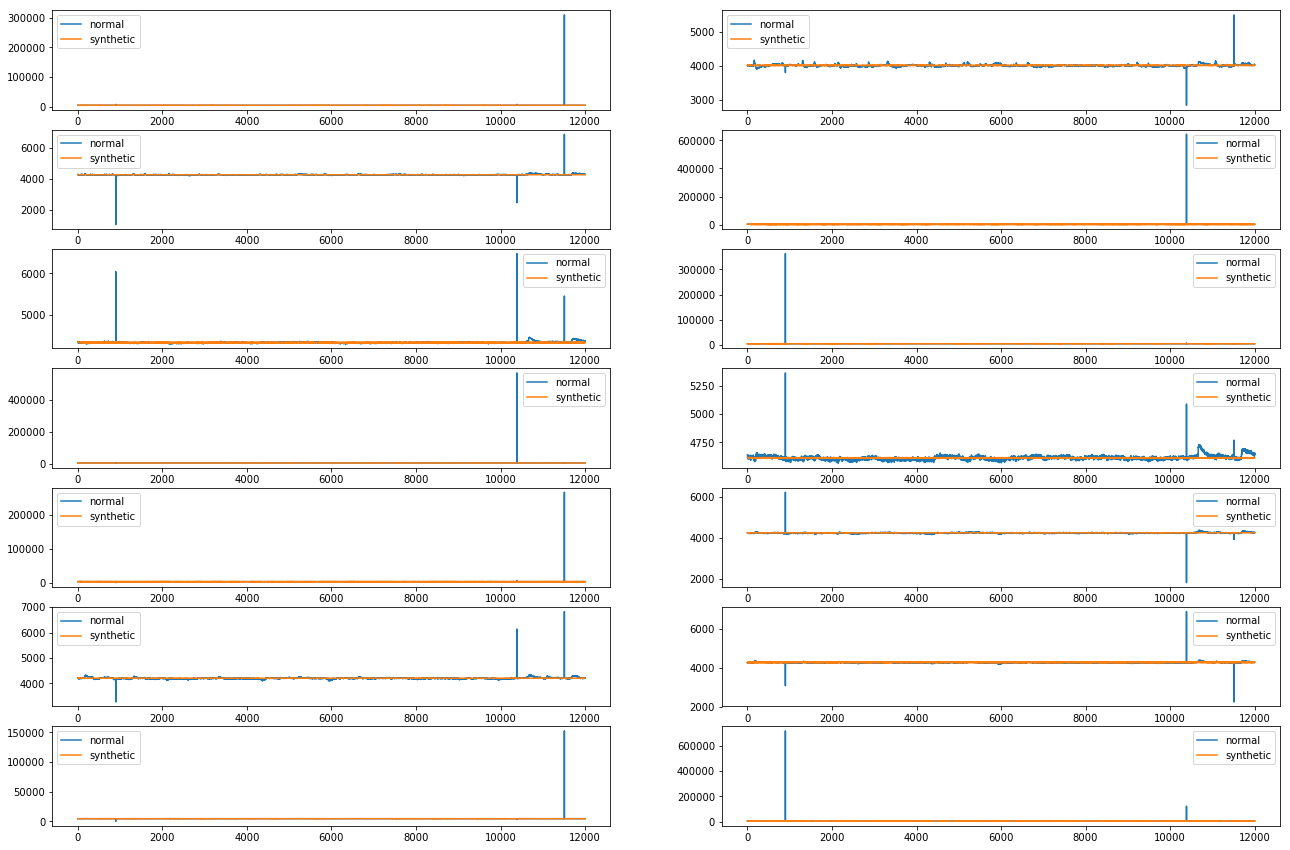

In [122]:
plt.figure(figsize=(22,15))
for i in range(0,df_1_ten.shape[1]):
    plt.subplot(7,2,i+1)
    plt.plot(df_1_ten[:,i], label="normal")
    plt.legend()
    plt.plot(p[:,i],label="synthetic")
    plt.legend()

In [ ]:
feat=12
plt.plot(df_1_tensor[:,feat])
#plt.plot(scal_objs[feat].fit_transform(d[:,feat].reshape(-1,1)))

In [ ]:
plt.figure(figsize=(22,15))
for i in range(0,features):
#     print("Synthetic data values",torch.max(d[:,0,i]), torch.min(d[:,0,i]))
#     print("i/p scaled value",torch.max(df_1_tensor[:,0,i]), torch.min(df_1_tensor[:,0,i]))
    plt.subplot(8,2,i+1)
    #plt.plot(d[:,i], label="synthetic")
    plt.plot(scal_objs[i].fit_transform(d[:,i].reshape(-1,1)), label="synthetic")
    plt.legend()
#     plt.plot(dummy[0,:,i], label="noisy")
#     plt.legend()
    plt.plot(df_1_tensor[:,i], label="real")
    plt.legend()

In [ ]:
plt.plot(d[:,])

In [46]:
# didnt realize but this loss function wont work for a 25 batch, not too difficult but will make changes now, 
#might even write it in the project sounds interesting
##KL divergence isnt teaching it well?????
def loss_function_comb(mu2,logvar2,mu1,logvar1,x):
    NLL_send=0
    KLD=0
    torch.pi =torch.acos(torch.zeros(1)).item() * 2
    torch.pi=torch.tensor(torch.pi)
    #print(mu2.shape,logvar2.shape,mu1.shape,logvar1.shape)
    for i in range(0,mu1.shape[1]):
            if(i<10):
                #print(mu2[i,:],logvar2[i,:])
                KLD=-0.5*torch.mean(logvar1[0,i,:]+1-(torch.exp(logvar1[0,i,:])+torch.square(mu1[0,i,:])))
                c=torch.log(2*torch.pi)
                b=logvar2[0,i,:]
                a= torch.square(x[i,:]-mu2[0,i,:])/torch.exp(logvar2[0,i,:])
                NLL=0.5*(a+b+c)
                NLL_send+=torch.mean(NLL)+KLD
            else:
                c=torch.log(2*torch.pi)
                b=logvar2[0,i,:]
                a= torch.square(x[i,:]-mu2[0,i,:])/torch.exp(logvar2[0,i,:])
                NLL=0.5*(a+b+c)
                NLL_send+=torch.mean(NLL)
    return NLL_send

In [47]:
def loss_function(mu2,logvar2,mu1,logvar1,x):
    torch.pi = torch.acos(torch.zeros(1)).item() * 2
    torch.pi=torch.tensor(torch.pi)
#     BCE=nn.functional.nll_loss( #trying MSE loss
#         x_hat, x.view(-1,7), reduction='sum'
#     )
#     Log probability: 
#         log(p(x | \mu, \sigma)) = -0.5 (\log(2\pi) + (x-mu)^2/\sigma^2 + \log(\sigma^2))
##using my custom negative log likelihood funciton
    #KLD= -0.5 * torch.mean(torch.exp(logvar1) - logvar1 - 1 + mu1.pow(2))
    KLD=-0.5*torch.mean(logvar1+1-(torch.exp(logvar1)+torch.square(mu1)))
    #NLL=0.5*torch.sum(torch.log(2*torch.pi) + torch.square(x-mu2)/logvar2.exp()+logvar2)
    c=torch.log(2*torch.pi)
    b=logvar2
    a= torch.square(x-mu2)/torch.exp(logvar2)
    NLL=0.5*(a+b+c)
    NLL=torch.mean(NLL)
    MSE=torch.mean((x-mu2)**2)
    
    return NLL+KLD

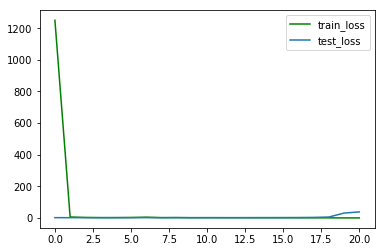

In [74]:
#print(train_rows)
#print(train_losses)
l=[]
for i in train_losses:
    l.append(i/train_rows)
plt.plot(l,color='green',label='train_loss')
plt.legend()
plt.plot(test_losses, label='test_loss')
plt.legend()

[15007899.282477595, 68342.87008571625, 33750.85667514801, 19676.589581489563, 21333.582716941833, 28995.415950775146, 54168.574602127075, 19165.575220108032, 24829.033262252808, 12172.599919319153, 14745.16063785553, 12936.133279800415, 11391.806064605713, 11487.499121665955, 9914.248959064484, 9202.560293912888, 7533.317113041878, 5774.146589115262, 3861.6206599995494, -714.5228011608124, -567.849917948246]


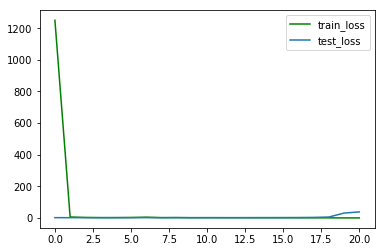

In [49]:
#print(train_rows)
print(train_losses)
l=[]
for i in train_losses:
    l.append(i/train_rows)
plt.plot(l,color='green',label='train_loss')
plt.legend()
plt.plot(test_losses, label='test_loss')
plt.legend()
# plt.plot(MSE_loss, color='pink', label='MSE')
# plt.legend()
# for i in train_losses:
#     print(i)

NameError: name 'd' is not defined

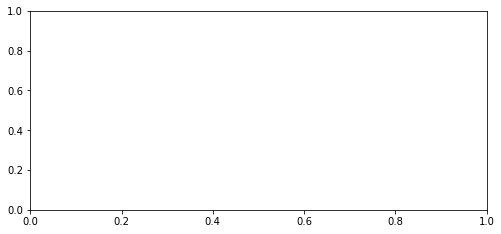

In [48]:
plt.figure(figsize=(18,30))
for i in range(0,7):
    #print(i)
#     print(i*2+1)
#     print(i*2+2)
    plt.subplot(7,2,i*2+1)
    plt.plot(d[:,i], label="synthetic")
    plt.legend()
    plt.subplot(7,2,i*2+2)
#     plt.figure(figsize=(15,20))
    plt.plot(df_1_tensor[:,i], label="real")
    plt.legend()

In [ ]:
fig, axs=plt.subplots(7,1,figsize=(22,15))

var=4
for i in range(0,7):
#     print("Synthetic data values",torch.max(d[:,0,i]), torch.min(d[:,0,i]))
#     print("i/p scaled value",torch.max(df_1_tensor[:,0,i]), torch.min(df_1_tensor[:,0,i]))
    fig.add_subplot(4,2,i+1)
    plt.plot(d[:,i], label="synthetic")
    plt.legend()
#     plt.plot(dummy[0,:,i], label="noisy")
#     plt.legend()
    plt.plot(df_1_tensor[:,i], label="real")
    plt.legend()

In [ ]:
fig, axs=plt.subplots(7,1,figsize=(22,15))

var=4
for i in range(0,7):
#     print("Synthetic data values",torch.max(d[:,0,i]), torch.min(d[:,0,i]))
#     print("i/p scaled value",torch.max(df_1_tensor[:,0,i]), torch.min(df_1_tensor[:,0,i]))
    fig.add_subplot(4,2,i+1)
    plt.plot(d[:,i], label="synthetic")
    plt.legend()
#     plt.plot(dummy[0,:,i], label="noisy")
#     plt.legend()
    plt.plot(df_1_tensor[:,i], label="real")
    plt.legend()

In [ ]:
p=0
sns.distplot(d[:,0,p], label="synthetic", axlabel='synthetic')
#sns.distplot(df_1_tensor[:,0,p], label="real", axlabel='real', color='green')

# Below rough and old code

In [ ]:
print(d.shape)

In [ ]:
d=d.reshape(5000,7)

In [ ]:
print(df_1_tensor.shape)

In [ ]:
df_1_tensor=df_1_tensor.reshape(train_rows,features)

In [ ]:
plt.plot(df_1_tensor[:,6])

In [ ]:
plt.plot(d[:,6])

In [ ]:
train_VAE(epochs,optimizer, encoder,decoder,df_1_tensor,test_tensor)

In [ ]:
epochs=50
#changed the next two from 50, 30 to 80,50

learn_rate=1e-3
optimizer=torch.optim.Adam(
     model.parameters(), lr=learn_rate
)
#based on flag neural netwokr know if data is 
for epoch in range(0,epochs+1):
    #training
    model.train()
    train_loss=0
##x happens only once since that is how the data has been split, no batch SGD is used
#    for x in df_1_tensor:
    for i in range(0,train_rows//bs):
        optimizer.zero_grad()
        #============forward=========
        mu2,logvar2,mu1,logvar1=model(dummy[i,:,:]) #noisy data fed here
        #print(mu2.shape,logvar2.shape,mu1.shape,logvar1.shape,x.shape)
        loss=loss_function_comb(mu2,logvar2,mu1,logvar1,df_1_tensor[i,:,:],) #loss function is wrt to actual data
        train_loss+=loss.item()
        #=====backpropagation=======
        #print(train_loss)
        loss.backward()
        optimizer.step()
    train_losses.append(train_loss)    
    print("train loss in epoch",epoch,train_loss/train_rows)
    with torch.no_grad():
        model.eval()#switch to let the network know, to prevent gradient evaluation during testing alongwith torch.no_grad()
        test_loss=0
        MSE=0
        L1=0
        for x in test_tensor:
            seq_len=x.shape[0]
            points=x.shape[1]
            #==============forward=========
            mu2,logvar2,mu1,logvar1 = model(x)
            test_loss= loss_function(mu2,logvar2,mu1,logvar1,x).item()    ##same as training
            mu2=mu2.reshape([bs,features])
            L1=nn.L1Loss()
            L1=L1(x,mu2)
            MSE=nn.MSELoss()
            MSE=MSE(x,mu2)
            test_loss+=L1.item()+MSE.item()
        test_losses.append(test_loss)    
        print("test loss in epoch",epoch,test_loss)

model=VAR(features,lstm_size,bot_nodes)

In [ ]:
mu2,logvar2,mu1,logvar1=model(df_1_tensor)

In [ ]:
print(mu2.shape,mu1.shape,logvar1.shape,logvar2.shape)

In [ ]:
epochs=50
#changed the next two from 50, 30 to 80,50
bot_nodes=80
lstm_size=50
noise=5# doenst matter, removed
model=Test(features,lstm_size,bot_nodes,noise)
train_losses=[]
test_losses=[]
MSE_loss=[]


In [ ]:
mu1,logvar1,z=encoder(df_1_tensor)
print(mu1.shape,logvar1.shape,z.shape)

In [ ]:
#see the shape of Mew1,logvar1
lstm_size,bot_nodes=7,7
noise=5
model=Test(features,lstm_size,bot_nodes,noise)
print(df_1_tensor.shape)
for i in range(0,train_rows//bs):
    mu2,logvar2,mu1,logvar1=model(x)
#     print(mu2,"shape",mu2.shape,"\n", logvar2,"shape",logvar2.shape,"\n",mu1,"shape",
#     mu1.shape,"\n",logvar1,"shape",logvar1.shape,sample,"\nsample",sample.shape)
    print(mu1.shape,logvar1,mu1.shape,logvar1)

In [ ]:
Old
class Discriminator(nn.Module):
    def __init__(self, features, hidden_len):#, output_len=1):
        super(Discriminator, self).__init__()
        self.hidden_len=hidden_len
        self.n_features=features
        
        self.layer1 = nn.Sequential(
            nn.Linear(features,hidden_len),
            nn.LeakyReLU(0.2)
            #nn.Dropout(0.3)
        )
        self.layer2 = nn.Sequential(
            nn.LSTM(hidden_len,hidden_len),
            #nn.LeakyReLU(0.2)
            #nn.Dropout(0.3)
        )
        self.layer3 = nn.Sequential(
            nn.LSTM(hidden_len, hidden_len),#to get mu and logvar that we use to get samples of the distribution
            #nn.Sigmoid() #forBCE
        )
        self.layer4=nn.Sequential(
            nn.LSTM(hidden_len,features) # features or feature*2 based on the loss function
        )
    
    def forward(self, x):
        length=x.shape[0]
        x= self.layer1(x)
        x=x.reshape(1,4096,self.hidden_len) ###frustrtated 
        x,_= self.layer2(x)
        x= self.layer3(x)
        return x
hidden_len=16
discriminator = Discriminator(features,16)

Data seems to be ready....going to use this for loop during training
1)Feed df_1_tensor for loss function
2)Feed dummy to the neural network

In [ ]:
for i in range(0,train_rows//bs):
    print(i)
    print("df_1_tensor\n\"",df_1_tensor[i,:,:],df_1_tensor[i,:,:].shape)
    #print("test_tensor\n\"",test_tensor[i,:,:],test_tensor[i,:,:].shape)
    print("dummy\n\"",dummy[i,:,:],dummy[i,:,:].shape)

# Training the VAE

In [ ]:
epochs=50
#changed the next two from 50, 30 to 80,50
bot_nodes=80
lstm_size=50
noise=5# doenst matter, removed
model=Test(features,lstm_size,bot_nodes,noise)
train_losses=[]
test_losses=[]
MSE_loss=[]
learn_rate=1e-3
optimizer=torch.optim.Adam(
     model.parameters(), lr=learn_rate
)
#based on flag neural netwokr know if data is 
for epoch in range(0,epochs+1):
    #training
    model.train()
    train_loss=0
##x happens only once since that is how the data has been split, no batch SGD is used
#    for x in df_1_tensor:
    for i in range(0,train_rows//bs):
        optimizer.zero_grad()
        #============forward=========
        mu2,logvar2,mu1,logvar1=model(dummy[i,:,:]) #noisy data fed here
        #print(mu2.shape,logvar2.shape,mu1.shape,logvar1.shape,x.shape)
        loss=loss_function_comb(mu2,logvar2,mu1,logvar1,df_1_tensor[i,:,:],) #loss function is wrt to actual data
        train_loss+=loss.item()
        #=====backpropagation=======
        #print(train_loss)
        loss.backward()
        optimizer.step()
#         #=====log======
#         for i in range(0,mu1.shape[1]):
#             if(i==0):
#                 #print(mu2[i,:],logvar2[i,:])
#                 print("oneeeeeee")
#                 print(Mu2[i,:],Logvar2[i,:],Mu1[i,:],Logvar1[i,:],x[i,:])
#                 loss=loss_function(Mu2[i,:],Logvar2[i,:],Mu1[i,:],Logvar1[i,:],x[i,:])
#                 loss.backward()
#                 train_loss+=loss.item()
#                 loss.backward(retain_graph=True)
#                 optimizer.step()
#             else:
#                 loss=l2(mu2[i,:],logvar2[i,:],x[i,:])
#                 #=====backpropagation=======
#                 loss.backward()
#                 train_loss+=loss.item()
#                 loss.backward()
#                 optimizer.step()
#         if(i==0):
#             loss+=loss_function(mu2,logvar2,mu1,logvar1,x)
#             print("train loss is",train_loss)
#         else:
#             loss+=l2(mu2,logvar2,x)
#             print("train loss is",train_loss)
        
#         loss.backward(retain_graph=True)
#         optimizer.step()
#        torch.autograd.set_detect_anomaly(True)
        #=====log======
    train_losses.append(train_loss)    
    print("train loss in epoch",epoch,train_loss/train_rows)
    with torch.no_grad():
        model.eval()#switch to let the network know, to prevent gradient evaluation during testing alongwith torch.no_grad()
        test_loss=0
        MSE=0
        L1=0
        for x in test_tensor:
            seq_len=x.shape[0]
            points=x.shape[1]
            #==============forward=========
            mu2,logvar2,mu1,logvar1 = model(x)
            test_loss= loss_function(mu2,logvar2,mu1,logvar1,x).item()    ##same as training
            mu2=mu2.reshape([bs,features])
            L1=nn.L1Loss()
            L1=L1(x,mu2)
            MSE=nn.MSELoss()
            MSE=MSE(x,mu2)
            test_loss+=L1.item()+MSE.item()
        test_losses.append(test_loss)    
        print("test loss in epoch",epoch,test_loss)
        #=====MSE of sample and i/p for synthetic data======
        # I feel it is not ne
        #================log===============
#             means.append(mu.detach())    ###Why detach()??? to avoid a copy
#             logvars.append(logvar.detach())
#             labels.append(y.detach())
# train loss in epoch 0 1.4391182532677285
# test loss in epoch 0 3.181245267391205
# train loss in epoch 50 1.394937967992091
# test loss in epoch 50 3.8220898509025574

In [ ]:
d_lr = 1e-3
g_lr = 1e-3
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=d_lr)
g_optimizer = torch.optim.Adam(generator.parameters(), lr=g_lr)

In [ ]:
#decoder
def train_generator(optimizer, generated data):
    

In [ ]:
def train_discriminator(optimizer, real_data, generated_data):
    

# Train the GAN - Use decoder as the Generator

# Generation of synthetic data

In [ ]:
noise_batch=200
with torch.no_grad():
    model.eval()
    z=torch.randn([noise_batch,bs,bot_nodes]) # finally parameterized
    z,_=model.decoder['Lstm4'](z)
    d,_=model.decoder['Lstm5'](z)
    d,_=model.decoder['Lstm6'](d)
#    d=nn.functional.sigmoid(d)
    x1_cap=torch.zeros((200,bs,features))
    #x1_cap=torch.randn((1000,5,features))
    d=torch.cat((d,x1_cap),2) 
    d=model.decoder['Linear'](d)
#    d=nn.Sigmoid(d)
    mu2=d[:,:,0:features]
    logvar2=d[:,:,features:features*2]
    d=model.getsample(mu2,logvar2)

Reshaping both synthetic and df_1_tensor(dummy2 redundant)

In [ ]:
d=d.reshape((5000,features))

In [ ]:
df_1_tensor=df_1_tensor.reshape((4075,features))

In [ ]:
dummy=dummy.reshape((4075,7))

In [ ]:
for i in range(0,7):
    print(i*2+1)
    print(2*i+2)

Now plot as much as you want

In [ ]:
#compare synthetic data to this
plt.plot(df_1_tensor[:500,6])
# dummy2=dummy2.reshape((1,4075,features))
# plt.plot(dummy2[:,:,6])

In [ ]:
plt.plot(d[:500,6])

In [ ]:
plt.plot(d[:4096,1])

In [ ]:
print(d.shape,df_1_tensor.shape)

In [ ]:
d=d.reshape((1,25000,features))

In [ ]:
d=d.reshape((1000,25,7))

In [ ]:
plt.plot(d[:4096,4])

In [ ]:
plt.plot(d[0,:4096,4])

In [ ]:
plt.plot(df_1_tensor[:,4])

In [ ]:
print(dummy2.shape)

In [ ]:
plt.plot(dummy2[:,6])

In [ ]:
plt.plot(df_1_tensor[:,:,6])

In [ ]:
df_1_tensor=df_1_tensor.reshape(4075,7)

In [ ]:
print(plt.plot(z[:,1,0]))

In [ ]:
x=StandardScaler().fit_transform(df_1)
plt.plot(x[:1000,1])

In [ ]:
for x in model.parameters():
    print(x.grad.shape)

In [ ]:
plt.plot(d[:,3,7])

In [ ]:
plt.plot(d[:1000,6])

In [ ]:
plt.plot(d[:,3,6])


Combined plots

In [ ]:
# suits the new dataset, 23 features
fig, axs=plt.subplots(7,2,figsize=(20,12))
feature_required=1
feat=0
for i in range(1,features*2+1):
    fig.add_subplot(7,2,i)
    plt.plot(d[:160,1,feat],  color='green', linewidth=0.5, markersize='0.3')

    fig.add_subplot(7,2,i)
    plt.plot(dummy2[:160,1,feat], color='green', linewidth=0.5, markersize='0.3')
    if(i%2==1):
        feat+=1

In [ ]:
print(features)

In [ ]:
model.parameters

In [ ]:
def l2(mu2,logvar2,x):
    torch.pi = torch.acos(torch.zeros(1)).item() * 2
    torch.pi=torch.tensor(torch.pi)
    
    c=torch.log(2*torch.pi)
    b=logvar2
    a= torch.square(x-mu2)/torch.exp(logvar2)
    NLL=0.5*(a+b+c)
    NLL=torch.mean(NLL)
    
    return NLL

In [ ]:
logvar1=torch.ones(1)
print(logvar1)
print(torch.square(logvar1))

In [ ]:
for i in range(0,mu1.shape[1]):
    print(i)
#             if(i<5):
#                 #print(mu2[i,:],logvar2[i,:])
#                 KLD=-0.5*torch.mean(logvar1[0,i,:]+1-(torch.exp(logvar1[0,i,:])+torch.square(mu1[0,i,:])))
#                 c=torch.log(2*torch.pi)
#                 b=logvar2[0,i,:]
#                 a= torch.square(x[i,:]-mu2[0,i,:])/torch.exp(logvar2[0,i,:])
#                 NLL=0.5*(a+b+c)
#                 NLL_send+=torch.mean(NLL)+KLD
#             else:
#                 c=torch.log(2*torch.pi)
#                 b=logvar2[0,i,:]
#                 a= torch.square(x[i,:]-mu2[0,i,:])/torch.exp(logvar2[0,i,:])
#                 NLL=0.5*(a+b+c)
#                 NLL_send+=torch.mean(NLL)
                
#     return NLL_send

In [ ]:
KLD=torch.mean(logvar1+mu1)
print(KLD)

In [ ]:
KLD=-0.5*torch.mean(logvar1[0,i,:]+1-(torch.exp(logvar1[0,i,:])+torch.square(mu1[0,i,:])))

In [ ]:
mu=torch.zeros(25,7)

In [ ]:
print(mu.shape[1])

In [ ]:
print(df_1_tensor.shape)

First point all four mu1,logvar1, mu2,logvar2 are important 
Second and Third point Only mu2 and logvar 2 imp as no need of KL divergence
shape[1] of both mu1,logvar1 and mu2,logvar2 will be same i.e., batch size(here 3)

In [ ]:
for i in range(0,train_rows//bs):
    print(dummy[i,:,:],dummy[i,:,:].shape)
    print(df_1_tensor[i,:,:],df_1_tensor[i,:,:].shape)

Trying to check parts of the decoder to see why synthetic data is scalling down so much

In [ ]:
x=torch.tensor([[1,3,4,5,6]])
print(x,x.shape)
z=x.reshape([1,1,5])
print(x,x.shape)
print(z,z.shape)

In [ ]:
for x in df_1_tensor:
    print(x,x.shape)

In [ ]:
print(bot_nodes+noise)

In [ ]:
print(d.shape)

In [ ]:
plt.plot(d[:,30])

In [ ]:
plt.plot(d[:,var ,0], label="synthetic")
plt.legend()

In [ ]:
print(df_1_tensor.shape)
# plt.plot(df_1_tensor[1,:,0], label="real")
# plt.legend()

In [ ]:
fig, axs=plt.subplots(4,2,figsize=(22,15))

for i in range(0,7):
    print("Synthetic data values",torch.max(d[:,0,i]), torch.min(d[:,0,i]))
    print("i/p scaled value",torch.max(df_1_tensor[:,0,i]), torch.min(df_1_tensor[:,0,i]))
    fig.add_subplot(4,2,i+1)
#     plt.plot(d[:,0,i], label="synthetic")
#     plt.legend()
    plt.plot(df_1_tensor[:,1,i], label="real")
    plt.legend()

Got some generative time series data
By using only part 1

In [ ]:
#Not bad but then data doesnt go as a batch in the neural network
for j in range(0, x.shape[0]):
            
            print(j)
            print(x[j,:].shape,x[j,:])
            
            if(j==0):
                mu2,logvar2,mu1,logvar1=model(x)
                loss=loss_function(mu2,logvar2,mu1,logvar1,x)
                train_loss+=loss.item()
                loss.backward()
                optimizer.step()
                #lossses.append(train_loss)
            elif(j==1 or j==2):
                mu2,logvar2,mu1,logvar1=model(x)
                loss=l2(mu2,logvar2,x)
                train_loss+=loss.item()
                loss.backward()
                optimizer.step()
                #lossses.append(train_loss)

Big issue needs to be solved, assignment of one tensor to another....and then when we make change to the second tensor first one shouldnt change...solved this using numpy---working with single dimensions atleast, yes higher too actually

In [ ]:
x=torch.tensor([[1,2,3],[3,4,6]])
print(x)
x_num=x.numpy()
print(x_num)

In [ ]:
y=torch.tensor(x_num)
print(y)

In [ ]:
print(df_1_tensor.shape)

In [ ]:
#tensor with variable size
x=torch.zeros([163,5,7])
y=torch.ones([1,5,7])
for i in range(0,x.shape[0]):
    x[i,:,:]=y

In [ ]:
print(x.shape,x)

# Play around with data

In [ ]:
plt.plot(df_1_tensor[:,1,5])
#5 points of the zeroth feature value

In [ ]:
x[0]=torch.tensor([0,0,0.])
print("x",x,"y\n",y)

Now trying for the bigger tensor---This defnitely works, the two are in no way related to each other---will try to variables one with and one without noise

In [ ]:
print(df_1_tensor,df_1_tensor.shape)

In [ ]:
df1num=np.array(df_1_tensor)
print(df1num,df1num.shape)

In [ ]:
df1mod=torch.tensor(df1num)

In [ ]:
print(df1mod,df1mod.shape)

In [ ]:
df1mod[0,0,2]=1
print(df1mod,df_1_tensor)

In [ ]:
x=torch.tensor([2,3,4])
print(x)
g=torch.tensor([7,8,9])
g=torch.stack((x,g))
print(g)
g=g.reshape()

In [ ]:
x = torch.Tensor(46, 300)
print(x.size()) #torch.Size([46, 300])

first_half = x[0:20, :]
second_half = x[20:, :]
new_row = torch.Tensor(1, 300)
new_x = torch.cat(first_half, new_row, second_half)

print(new_x.size())

In [ ]:
# x=torch.tensor([2,3,4])
# g=torch.tensor([7,8,9])
# h=torch.tensor([10,11,12])
# mu1=torch.stack((x,g))
# print(mu1)
print(mu1[0])


In [ ]:
z=torch.randn([2,2048,7])
d,_=model.decoder['Lstm'](z)
d=model.decoder['Linear'](d)
mu2=d[:,:,0:features]
logvar2=d[:,:,features:features*2]
d=model.getsample(mu2,logvar2)
print(d,d.shape)

In [ ]:
#plt.plot(d[0,:,3].detach().numpy())
print(d.shape)
fig, axs=plt.subplots(3,2,figsize=(20,12))
print(torch.max(d[0,:,0]), torch.min(d[0,:,0]))
print(torch.max(d[0,:,1]), torch.min(d[0,:,1]))
print(torch.max(d[0,:,2]), torch.min(d[0,:,2]))
print(torch.max(d[0,:,3]), torch.min(d[0,:,3]))
print(torch.max(d[0,:,4]), torch.min(d[0,:,4]))
print(torch.max(d[0,:,5]), torch.min(d[0,:,5]))
print(torch.max(d[0,:,6]), torch.min(d[0,:,6]))
fig.add_subplot(4,2,1)
plt.plot(d[:,0,0].detach().numpy())

fig.add_subplot(4,2,2)
plt.plot(d[:,0,1].detach().numpy())

fig.add_subplot(4,2,3)
plt.plot(d[:,0,2].detach().numpy())

fig.add_subplot(4,2,4)
plt.plot(d[:,0,3].detach().numpy())
fig.add_subplot(4,2,5)
plt.plot(d[:,0,4].detach().numpy())
fig.add_subplot(4,2,6)
plt.plot(d[:,0,5].detach().numpy())
fig.add_subplot(4,2,7)
plt.plot(d[:,0,6].detach().numpy())

In [ ]:
x = torch.arange(4.0)
x.requires_grad_(True)
# x.grad
print(x)

In [ ]:
y = 2 * torch.dot(x, x)#after differentiation 2x^3 becomes 6x^2
print(y)

In [ ]:
y.backward()
print(x.grad)

In [ ]:
print(x.detach())

In [ ]:
p=x+2
print(p.detach())

In [ ]:
x=torch.tensor([1,2,3])
y=torch.tensor([4,5,6])

In [ ]:
z=x+y
print(z)
z=torch.sum(x+y) #use in loss functions to find gradient
print(z)

Now using the list of scal_objs that I made in phase 2 to rescale the synthetic data

In [ ]:
fig, axs=plt.subplots(3,2,figsize=(20,12))

y_inv=y1.inverse_transform(y)
print(y_inv)
fig.add_subplot(4,2,1)
plt.plot(d[0,:,0].detach().numpy())

fig.add_subplot(4,2,2)
plt.plot(d[0,:,1].detach().numpy())

fig.add_subplot(4,2,3)
plt.plot(d[0,:,2].detach().numpy())

fig.add_subplot(4,2,4)
plt.plot(d[0,:,3].detach().numpy())
fig.add_subplot(4,2,5)
plt.plot(d[0,:,4].detach().numpy())
fig.add_subplot(4,2,6)
plt.plot(d[0,:,5].detach().numpy())
fig.add_subplot(4,2,7)
plt.plot(d[0,:,6].detach().numpy())

In [ ]:
print(d,d.shape)

In [ ]:
for x in df_1_tensor:
    plt.plot(x[:10,3])

In [ ]:
print(df_1_tensor.shape)

In [ ]:
-----not using because shouldnt include in the main function directly
def loss_function2(mu2,logvar2,mu1,logvar1,x,z,seq_len):
    torch.pi = torch.acos(torch.zeros(1)).item() * 2
    torch.pi=torch.tensor(torch.pi)
#     BCE=nn.functional.nll_loss( #trying MSE loss
#         x_hat, x.view(-1,7), reduction='sum'
#     )
#     Log probability: 
#         log(p(x | \mu, \sigma)) = -0.5 (\log(2\pi) + (x-mu)^2/\sigma^2 + \log(\sigma^2))
##using my custom negative log likelihood funciton
    KLD= 0.5 * torch.sum(logvar1.exp() - logvar1 - 1 + mu1.pow(2)) ## the KL divergence is wrt a Normal distribution ~N(0,1)
    NLL=-0.5*torch.sum(torch.log(2*torch.pi) + torch.square(x-mu2)/logvar2.exp()+logvar2)
    MSE=torch.sum((x-z)**2)/4096 ##MSE & L1 cant be calculated when dimension of bottleneck and i/p different?? # try mean squred error b/w o/p and i/p
    L1=torch.sum(x-z)/4096##MSE & L1 cant be calculated when dimension of bottleneck and i/p different??
    
    return NLL+KLD+MSE+L1

In [ ]:
##making an LSTM to understand
##Made the whole thing, atleast I can say that I embedded an LSTM into the network somehow with a linear layer using dictionaries
class Test_linear(nn.Module):
    def __init__(self,n_features, var, bottleneck_nodes):
        super().__init__()

        self.n_features, self.var=n_features,var
        self.bot_nodes=bottleneck_nodes
        ##took me a fill evenings and frustration, LSTM always takes 3 dimesions, let the first one be 1
        self.encoder=nn.ModuleDict({
            'Lstm':nn.LSTM(
                input_size=self.n_features,
                hidden_size=self.var,
            ),
            #'Linear':nn.Linear(self.var, self.bot_nodes*2)# Can vary the bottle neck
            'Linear':nn.Linear(self.n_features, self.bot_nodes*2) 
        })
        
        
        self.decoder=nn.ModuleDict({
            'Lstm':nn.LSTM(
                input_size=self.bot_nodes,
                hidden_size=self.var*2
            ),
            #'Linear':nn.Linear(self.var*2,self.n_features*2),
            'Linear':nn.Linear(self.bot_nodes,self.n_features*2),
            'Logsoftmax':nn.LogSoftmax(dim=1),
            'Relu':nn.ReLU()
        })
    def getsample(self, mu, logvar):
        if self.training: #inbuilt object which according to me is inherited from nn.Module
            stan_dev=logvar.mul(0.5).exp_()
            eps = stan_dev.data.new(stan_dev.size()).normal_() #acually epsilon is form normal dis table, sample is the whole Mew+X*sigma
            return eps.mul(stan_dev).add_(mu) #Mew+X*sigma
        else:
            return mu
        
    def forward(self,x):
        length=x.shape[0]  #to get seq_len
##         x=x.reshape((1, length, self.n_features))# batch sends the whole things, not using SGD,
##         x,_=self.encoder['Lstm'](x)
        mu_logvar=self.encoder['Linear'](x)
        #a leap of faith, for knowing how mu is [:0:] and logvar[:1:], actually just a bunch of the outputs 
        #taken as mean and variance
#        mu1=mu_logvar[:, 0:self.bot_nodes]# dimension at mu_logvar1/bottleneck               
#        logvar1 = mu_logvar[:, self.bot_nodes:self.bot_nodes*2]
        mu1=torch.zeros([length, self.bot_nodes])
        logvar1=torch.zeros([length, self.bot_nodes])
        z=self.getsample(mu1,logvar1)#need to feed this to the decoder
        sample=z
        #reshape it into (hidden_dim x features)
#        z=z.reshape((1, length, self.n_features)) #dont need the reshape anymore
##        z,_=self.decoder['Lstm'](z)
#         #z=z.reshape((1, self,self.var*2))
        z=self.decoder['Linear'](z)
#         ##tried log softmax as it woud
##         mu2=z[:,:,0:self.n_features]
##         logvar2=z[:,:,self.n_features:self.n_features*2]
        mu2=z[:,0:self.n_features]
        logvar2=z[:,self.n_features:self.n_features*2]
#       z=self.getsample(mu1,logvar1)----no need to remove sample frm here, just train your model for now
        return mu2,logvar2,mu1,logvar1,sample
#mu2,logvar2,mu1,logvar1
#if problem
#1) Put relu b/w LSTM and linear---actually didnt need this

In [ ]:
learn_rate=1e-2

optimizer=torch.optim.Adam(
    model.parameters(), lr=learn_rate
)

In [ ]:
x=torch.randn([1,4096,7])
print(x,x.shape)

In [ ]:
---warning----Data augmentation
test_tensor=torch.cat((test_tensor,test_tensor),dim=1)
print(test_tensor.shape)

# Loss function

# Optimizer

In [ ]:
torch.save(model.state_dict(),'Models/LSTM_gen.pt')

In [ ]:
model=torch.load('Models/LSTM_gen.pt')
print(model)

###Rough functions down here to try things-------------------------

In [ ]:
z=model(train_tensor)
# print(z[0][1])
# print(z[0][2])
print(z)

In [ ]:
input = torch.randn(3, 5, requires_grad=True)
print("input",input,"\ntarget",target)
# each element in target has to have 0 <= value < C
target = torch.tensor([1, 0, 4])
for i in range(0,10):
    m = nn.LogSoftmax(dim=1)
    loss = nn.NLLLoss()
    # input is of size N x C = 3 x 5
    output = loss(m(input), target)
    output.backward()
    print(output)

In [ ]:
test_tensor.add

In [ ]:
adder1=torch.randn([1,2048,7])
adder2=torch.randn([1,2048,7])

In [ ]:
loss=nn.MSELoss(size_average=None, reduce=None, reduction: str = 'mean')
x=loss(adder1,adder2)

In [ ]:
a=torch.tensor([1,1,1])
b=torch.tensor([2,2,2])

In [ ]:
for i in range(0,a.shape[0]):
    x=nn.L1Loss(a[i],b[i],reduction='mean')
    print(x.zero_grad)

In [ ]:
mu1=torch.zeros([4096,7])
mu2=torch.zeros([4096,7])
print(mu1,mu2)

In [ ]:
x=torch.sum()

In [ ]:
a=torch.tensor([3,4,5])
b=torch.tensor([2,90,5])

In [ ]:
print(torch.sum(a-b))

In [ ]:
model.items()

In [ ]:
test_tensor.shape[2]

In [ ]:
print(3//2)

# Concatenation(Not used actually)

Concatenation, not using now but will be useful incase I ever need to concatenate tensors to increase size

In [ ]:
adder=torch.cat((adder1,adder1),dim=1)

In [ ]:
print(adder.shape)

In [ ]:
x=torch.randn(1,4,3)##the one has a lot of significance as  it is a 3 dimensional Tensor
print(x)
#x=x.reshape(1,4,3)
#print(x)

In [ ]:
print(scal_objs.)

In [ ]:
fig, axs=plt.subplots(3,2,figsize=(20,12))
feat=0
for i in range(0,features):
    fig.add_subplot(4,2,i+1)
    plt.plot(df_1_tensor[:,:,i].detach().numpy())

In [ ]:
##really important to understand High dimensionality
#list actually overcomplicated it, directly used z on top
print(l)
print(l[0].dtype)
print(l[0])
print(l[0][0])
print(l[0][0][1])


In [ ]:
bottleneck_mean=model(train_tensor)
print(bottleneck_mean[0][1])
print(bottleneck_mean[0][2])
print(bottleneck_mean.names)
print("Mean",bottleneck_mean[:,0,:])
print("Variance",bottleneck_mean[:,4095,:])

In [ ]:
for i in train_tensor:
    print(i)
    print(i.dtype)

In [ ]:
model.parameters

In [ ]:
print(z[0][1][2])

# Entire bottleneck process for a VAE

In [ ]:
#Bottleneck, mean, std and sampling of the VAE with random Tensors of length 14
mu=torch.randn(7)
logvar=torch.randn(7)
print("mean",mu)
print("logvar",logvar)
stan_dev=logvar.mul(0.5).exp_()
eps = stan_dev.data.new(stan_dev.size()).normal_()
print("std.deviation",stan_dev,"\nepsillon",eps)
sum=mu+eps*stan_dev
print("Sample pulled out of distribution",sum)

In [ ]:
pop=torch.randn(5)
print(pop)
stan_dev=pop.exponential_()
print(stan_dev)

# Negative log likelihood

In [ ]:
y=torch.randn([5,7])
y_pred=torch.ones([5,7])
def loss_function(y_pred, y):
    NLL_fun=nn.functional.nll_loss(y_pred,y)
    NLL=nn.NLLLoss(y_pred,y)
    return NLL_fun,NLL
NLL_fun, NLL=loss_function(y_pred,y)
print(NLL_fun)
print(NLL)
# x_hat=torch.randn(5)
# print("x",x,"\nx_hat",x_hat)
# loss=nn.functional.nll_loss()
#print(x+torch.tensor([1,1,1,1,1]))----actually works

In [ ]:
x=torch.normal(torch.arange(0.1,5), torch.arange(.5,5))
print(x)

In [ ]:
pop=torch.Size([22])

In [ ]:
print(pop)

In [ ]:
target = torch.tensor([[1,0,4],[3,2,1]])
print(target,target.shape)

In [ ]:
print(train_tensor)
print(train_tensor[0][0])###onlly use this at the moment for loss funtion

In [ ]:
x=torch.normal(torch.tensor(0.),torch.tensor(1))
print(x)

In [ ]:
z=torch.tensor(0.2)**torch.tensor(2)
print(z)

In [ ]:
print(x.detach())

In [ ]:
mean=torch.arange(.1, 20)
print(mean)

In [ ]:
m = nn.Sigmoid()
#input = torch.randn(2, 3)
print(input)
output = m(input)
print(output)

In [ ]:
l=dict(mew=list(), dob=list())
s=1
l.update([12,'dasd'])

# Old approach to try and tackle 2)

In [ ]:

#         mu2,mu1=[],[]
#         logvar1,logvar2=[],[]
#         for j in range(0, x.shape[0]):
#             if(j==0):
#                 x=x.reshape((1, 1, self.n_features))# batch sends the whole things, not using SGD,
#                 x,_=self.encoder['Lstm'](x)
#                 mu_logvar=self.encoder['Linear'](x)
#                 #a leap of faith, for knowing how mu is [:0:] and logvar[:1:], actually just a bunch of the outputs 
#                 #taken as mean and variance
#                 mu1=mu_logvar[:, :, 0:self.bot_nodes]# dimension at mu_logvar1/bottleneck               
#                 logvar1 = mu_logvar[:,:, self.bot_nodes:self.bot_nodes*2]
#                 z=self.getsample(mu1,logvar1)#need to feed this to the decoder, not used actually
#                 #reshape it into (hidden_dim x features)
#         #        z=z.reshape((1, length, self.n_features)) #dont need the reshape anymore
#         #        z=z+torch.randn([1,2,7]) #added some noise in decoder to try and train with some noise
#                 d,_=self.decoder['Lstm'](z)
#         #        d=torch.sum(d+self.x1_cap)
#         #         #z=z.reshape((1, self,self.var*2))
#                 m = nn.Dropout(p=0.2)
#                 d=m(d)
#                 d=self.decoder['Linear'](d)
#                 mu2=mu2.append(d[:,:,0:self.n_features])
#                 logvar2=logvar2.append(d[:,:,self.n_features:self.n_features*2])
#             else:
#                 x=x.reshape((1, 1, self.n_features))# batch sends the whole things, not using SGD,
#                 x,_=self.encoder['Lstm'](x)
#                 mu_logvar=self.encoder['Linear'](x)
#                 #a leap of faith, for knowing how mu is [:0:] and logvar[:1:], actually just a bunch of the outputs 
#                 #taken as mean and variance
#                 mu1=mu_logvar[:, :, 0:self.bot_nodes]# dimension at mu_logvar1/bottleneck               
#                 logvar1 = mu_logvar[:,:, self.bot_nodes:self.bot_nodes*2]
#                 z=self.getsample(mu1,logvar1)#need to feed this to the decoder, not used actually
#                 #reshape it into (hidden_dim x features)
#         #        z=z.reshape((1, length, self.n_features)) #dont need the reshape anymore
#         #        z=z+torch.randn([1,2,7]) #added some noise in decoder to try and train with some noise
#                 d,_=self.decoder['Lstm'](z)
#         #        d=torch.sum(d+self.x1_cap)
#         #         #z=z.reshape((1, self,self.var*2))
#                 m = nn.Dropout(p=0.2)
#                 d=m(d)
#                 d=self.decoder['Linear'](d)
#                 mu2=torch.stack(mu2,d[:,:,0:self.n_features])
#                 logvar2=d[:,:,self.n_features:self.n_features*2]
                
                
                
        
# #         self.x1_cap=self.getsample(mu2.detach(),logvar2.detach())
# #         print("x1_cap",self.x1_cap)
#         return mu2,logvar2,mu1,logvar1#dhi,self.x1_cap,sample
# #mu2,logvar2,mu1,logvar1
# #if problem
# #1) Put relu b/w LSTM and linear---actually didnt need this'''

In [ ]:
x=np.array([0,1,2])
#print(x)
dataset=[torch.tensor(s, dtype=torch.float32) for s in x]
dataset[1].mul(dataset[2]).add(dataset[2])
#print(dataset)
#converted numpies to tensors

In [ ]:
#actually quite flawed cz its time series and time series data has to be in sequence
''''for f in range(1,4):
    string=f'df_{f}'
    print(string)
    string=pd.DataFrame()
    string=pd.read_csv(f'Datasets/Rapid Component degradation Vega/NewBlade00{f}.csv')
    print(string)
#    exec(string%pd.read_csv(f'Datasets/Rapid Component degradation Vega/NewBlade00{f}.csv'))
#tried automation but time series so cant compile together from what I understand
''for f in range(1,4):
    if(f==1):
        df_ano=pd.read_csv(f'Datasets/Rapid Component degradation Vega/WornBlade00{f}.csv')
    else:
        df1=pd.read_csv(f'Datasets/Rapid Component degradation Vega/WornBlade00{f}.csv')
        df_ano=df_ano.append(df1)''''''

In [ ]:
#variable to control the no. of nodes
##oldest VAE model without LSTM, but made less sense cz no time dependencies
d=20
class VAE(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encoder=nn.Sequential(
            nn.Linear(7,d**2),
            nn.ReLU(),
            nn.Linear(d**2,d*2)
        )
        
        self.decoder=nn.Sequential(
            nn.Linear(d,d**2),
            nn.ReLU(),
            nn.Linear(d**2,7),
            nn.ReLU()
        )
        
    def getsample(self, mu, logvar):
        if self.training: #inbuilt object which according to me is inherited from nn.Module
            stan_dev=logvar.mul(0.5).exp_()
            eps = stan_dev.data.new(stan_dev.size()).normal_() #sample that you pull out of the normal distribution i think
            return eps.mul(stan_dev).add_(mu)
        else:
            return mu
        
    def forward(self,x):
        length=x.shape[0]
        mu_logvar=self.encoder(x.view(-1,length)).view(-1,2,d)##i am considering each of the 7 features being sent
        #separate mean and variance
        mu=mu_logvar[:,0,:]
        logvar = mu_logvar[:,1,:]
        #get a sample out of the encoder to feed to the 
        z=self.getsample(mu, logvar)
        return self.decoder(z), mu, logvar
model=VAE()